[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/05-Getting-Started-with-ggplot2.ipynb)



# <a name="05-title"><font size="6">Module 05: Getting Started with `ggplot2`</font></a>

---

# <a name="intro-ggplot">The `ggplot2` Package</a>

---

Thus far, we have created some perfectly fine looking visualizations in base R using function such as `plot()`, `hist()`, and `boxplot()`. There are other plotting functions and packages in R that can be used to generate similar and additional plots.


In this module we discuss how to perform basic data visualization use an R package called <font color="dodgerblue">**ggplot2**</font> (Wickham 2016; Wickham et al. 2023) which is perhaps the most powerful and intuitive package for producing data visualizations. `ggplot2` is different from most other graphical packages since it has a natural underlying grammar. In fact, that is what the `gg` in `ggplot2` stands for, namely *Grammar of Graphics*.  `ggplot2` is perhaps the most popular and powerful tool for constructing statistical graphics because it is so flexible and it has such an elegant framework.

![The ggplot2 logo](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Ggplot2_hex_logo.svg/208px-Ggplot2_hex_logo.svg.png)




# <a name="packages">Loading and Installing Required Packages</a>

---


The `ggplot2` package is already installed in Google Colab. However, in order access the scripts and files stored in `ggplot2`, recall we need to load the package with the `library()` command every time we start a new R session.

In [39]:
# load ggplot2 each time you start a new R session
library(ggplot2)

We will working with a data set containing data on penguins that is stored in a package called `palmerpenguins`. Run the code cell below to try and load the `palmerpenguins` package.

In [3]:
# running this code cell returns an error
# the palmerpenguins package is not installed in Colab
library(palmerpenguins)

ERROR: Error in library(palmerpenguins): there is no package called ‘palmerpenguins’


## <a name="install-pack">Installing Packages in Colab</a>

---

The `palmerpenguis` package has not been installed in Google Colab, so we are unable to load the package with the `library()` command. No problem, we can first install the package with the command below.

- `install.packages("palmerpenguins")`

This installs the package, but the `palmerpenguins` package has not been loaded yet. We still need to run a `library()` command to load the package into this session after installing the package to access the files stored in the package. Thus, it is a two step process:

1. Install a package with `install.packages()`.
2. Load a package with `library()`.



In [40]:
# install and loading palmer penguins package
install.packages("palmerpenguins")  # installs package (but not loaded yet)
library(palmerpenguins)  # loads the installed package into the active sesssion

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# <a name="tips">Tips for Good Graphics</a>

---


Data graphics should be as *informative* as possible.

-   Graphics do *not* need to contain as much *information* as possible.
-   Make it as easy to understand the information you want to reveal
    about the data.
-   Simpler graphics are easier to understand and should be preferred.
-   Adding complexity to a graphic can sometimes reveal far more about
    the data than a simple graphic.
-   Make sure labels and text are large enough to easily read.
-   Make sure colors are distinguishable and colorblind friendly (e.g.,
    using the [**viridis**](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html) (Garnier 2023) package).

You will have to decide what is needed in a graphic to make it as
informative as possible.

Complicated graphics may present far more information than we are able
to process, such as in the example below.

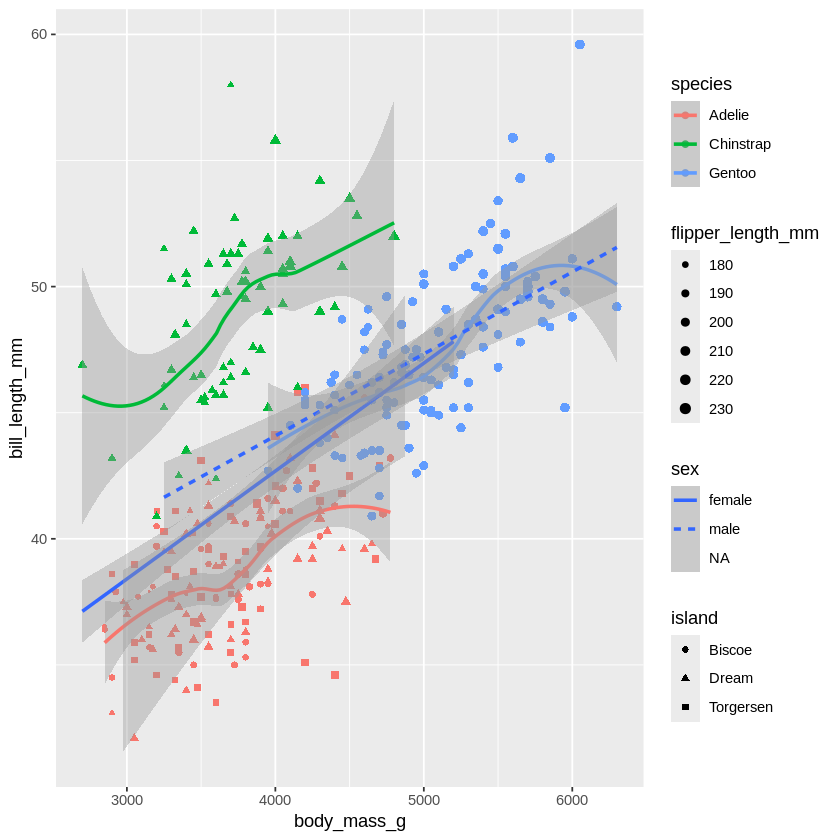

In [201]:
#data(penguins, package = "palmerpenguins")
ggplot(penguins) +
  geom_point(aes(x = body_mass_g,
                 y = bill_length_mm,
                 col = species,
                 shape = island,
                 size = flipper_length_mm),
                 na.rm = TRUE) +
  scale_size_continuous(range = c(0.5, 2.5)) +
  geom_smooth(data = penguins,
              mapping = aes(x = body_mass_g,
                            y = bill_length_mm,
                            col = species),
              formula = y ~ x,
              method = "loess",
              na.rm = TRUE) +
  geom_smooth(data = penguins,
              mapping = aes(x = body_mass_g,
                            y = bill_length_mm,
                            linetype = sex),
              formula = y ~ x,
              method = "lm",
              na.rm = TRUE)

# <a name="graph-systems">Graphics Ecosystems in R</a>

---

There are three main graphics ecosystems in R:

1.  [**base**](https://r-charts.com/base-r/)
2.  [**lattice**](https://www.datacamp.com/doc/r/trellis)
3.  [**ggplot2**](https://r-charts.com/ggplot2/)

**base** graphics are traditional S-like graphics.

-   These are the graphics you get by default when you use the `plot` function, the `hist` function, the `boxplot` function, etc.

**lattice** graphics are an implementation of Trellis graphics (Becker, Cleveland, and Shyu 1996) for R.

-   The **lattice** package focuses on elegantly plotting multivariate data and makes it easy to distinguish different levels of `factor` data.
-   **lattice** and **base** graphics do not interact with each other (changing aspects of one graphics system has no impact on the other.)

**ggplot2** is a layered graphical system based on implementing the Grammar of Graphics (Wilkinson 2005).

-   It has gained widespread popularity because of its friendliness for visual exploration of data by data scientists.
-   It provides an elegant approach for constructing complex plots in a systematic way.



## <a name="ex-eco-mpg">Example: Plotting `mpg` Data with Three Different Ecosystems</a>

---


We demonstrate use of the three plotting ecosystems using the a data frame named `mpg` which is bundled with the `ggplot2` package. The data set includes information about the fuel economy of popular car models from 1999 through 2008, collected by the [US Environmental Protection Agency](http://fueleconomy.gov).  

In particular, we illustrate how to construct a scatter plot using the three different plotting ecosystems with the `mpg` data frame focusing on the following variables:

- `displ`: engine displacement, in litres, is stored as a decimal.
- `cty`: city miles per gallon is stored as an integer.
- `drv`: type of drive train is stored as a character.
  - "f" is front wheel,
  - "r" is real wheel,
  - "4" is 4 wheel drive.

In the code cell below, we convert `drv` to `factor` so it is treated as a categorical variable.


In [6]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


We now create a grouped scatter plot using **base** graphics, including
the appropriate legend.

In [7]:
mpg$drv <- factor(mpg$drv)

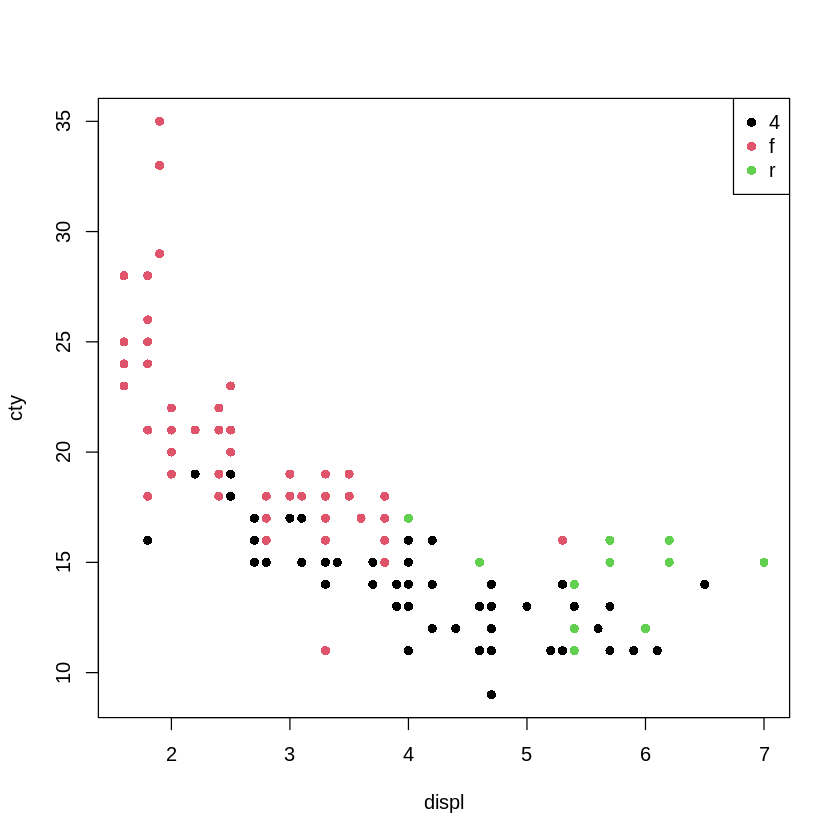

In [8]:
plot(cty ~ displ, data = mpg, col = drv, pch = 16)
legend(x = "topright", legend = levels(mpg$drv), col = 1:3, pch = 16)

Next, we create a grouped scatter plot using the **lattice** package.

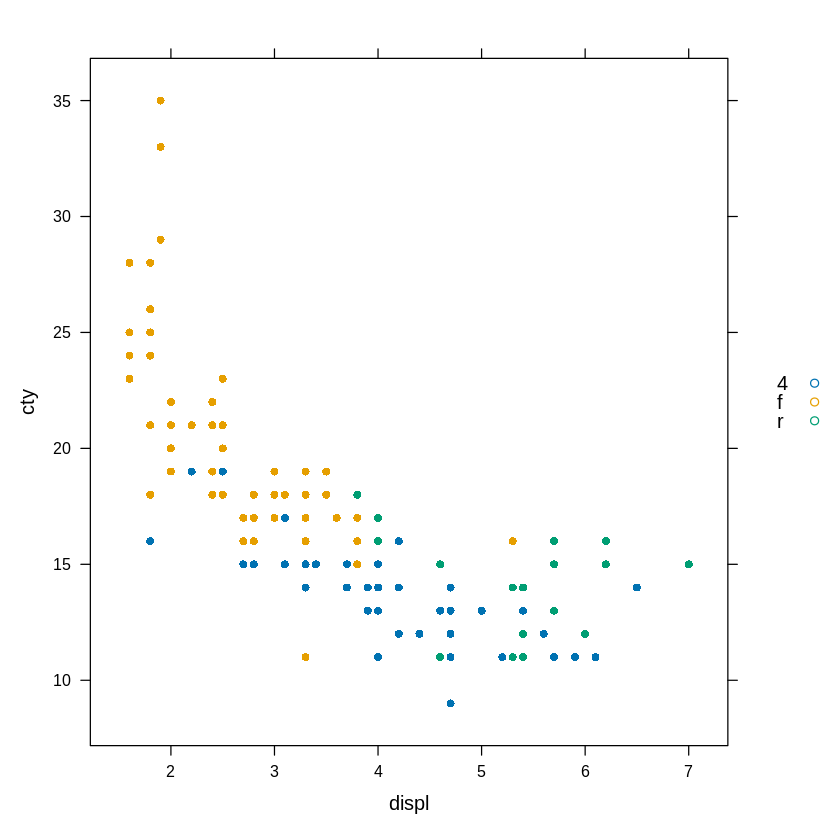

In [9]:
lattice::xyplot(cty ~ displ, data = mpg, group = drv, pch = 16,
                auto.key = TRUE)

Lastly, we create a grouped scatter plot using the **ggplot2** package.

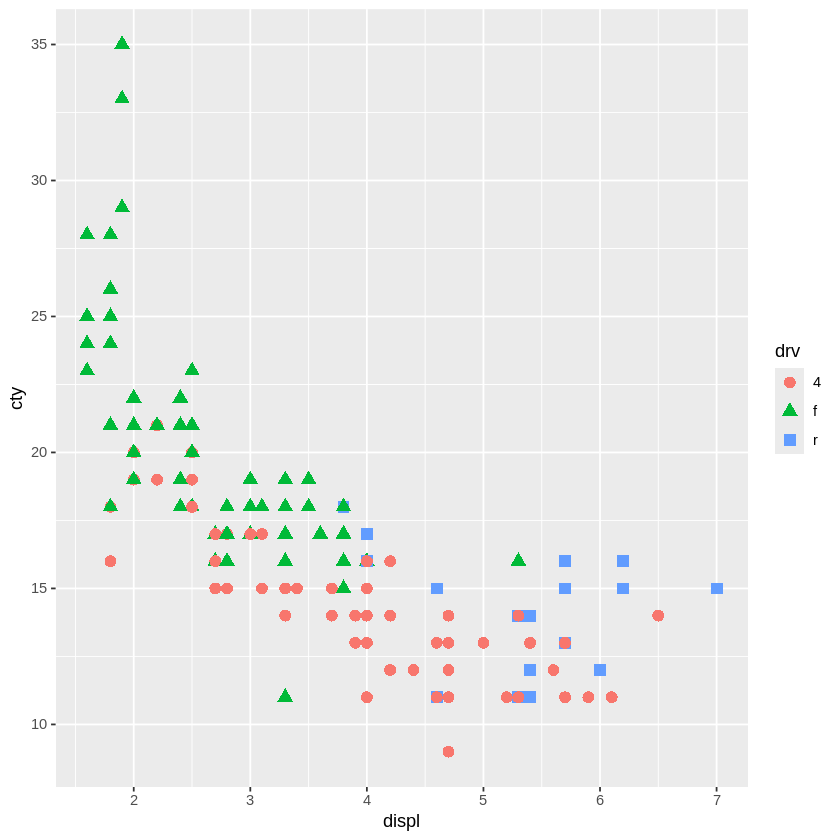

In [11]:
ggplot(
  data = mpg,
  mapping = aes(x = displ, y = cty, color = drv, shape = drv)
) +
  geom_point(size = 3)

# <a name="grammar">The Grammar of Graphics</a>

---

Wilkinson<sup>1</sup> derived the <font color="dodgerblue">**grammar of graphics**</font> to describe inherent properties foundational to all statistical graphics. The layered grammar of graphics developed by Wickham<sup>2</sup> builds on Wilkinson's grammar, has been adapted for embedding within R, and has evolved into `ggplot`. A first description of the basic ingredients of `ggplo` are described below. We first introduce new  terminology that we will develop further as we dig deeper into working with the `ggplot2` package.

Before we begin exploring `ggplot2`, it is important to acknowledge one important limitation.

> <font color="dodgerblue">**`ggplot2` does not suggest which graphics you should use to answer the questions you are interested in.**</font>

<br>  

<font size="-1">1. Wilkinson L (2005). The grammar of graphics. Statistics and computing, 2nd edn. Springer, New York</font><br>
<font size="-1">2. Wickham (2010). A layered grammar of graphics. J Comput Graph Stat 19(1):3-28</font>

## <a name="ingredients">Basic ingredients</a>

---

There are 4 main components needed to produce a graphic using
**ggplot2**.

1.  A <font color="dodgerblue">**data frame**</font> containing your data.
    -   Each column should be a variable and each row should be an
        observation of data.
2.  A <font color="dodgerblue">**`ggplot` object**</font>.
    -   This is initialized using the `ggplot` function.
3.  An <font color="dodgerblue">**aesthetic mapping**</font> indicates what role a variable plays in the plot. For example:
    -   Which variable (if any) is plotted on the $x$-axis? Which variable (if any) is plotted on the $y$-axis?
    - Which variable controls the color of features?
    - Which variable controls the size of features?
4.  A <font color="dodgerblue">**geometric object**</font>. These are called *geoms* for short.
    -   They indicate the type of plot that is desired.
    -   Histogram, density, boxplot, are some common examples of geoms.
        shape.
    -   They also indicate the geometric object used to visualize the data.
    -   Points, lines, or polygons are some examples of geoms to name a few.


<!-- $x$ -->

In [*R for Data Science*](https://r4ds.hadley.nz/data-visualize), Wickham and Grolemund (2023) provide the following template for creating graphics using `ggplot2`:

    ggplot(
      data = <DATA>,
      mapping = aes(<MAPPINGS>)
      ) +
      <GEOM_FUNCTION>()

`<DATA>`, `<MAPPINGS>`, and `<GEOM_FUNCTION>` are placeholders that you
replace with the data frame, aesthetic mappings, and geometric object, respectively, you want to use in your specific plot.



## <a name="basic-steps">Basic Steps for Creating a Plot with `ggplot2`</a>

---

Here is an explanation of the template above:

1.  Every `ggplot` starts with a call to the `ggplot` function.

2.  Generally, you pass your data frame to the `ggplot` through the
    `data` argument.
    -   You can also pass `data` inside the `<GEOM_FUNCTION>` when you
        intend to use multiple geometric objects with different data
        sources.


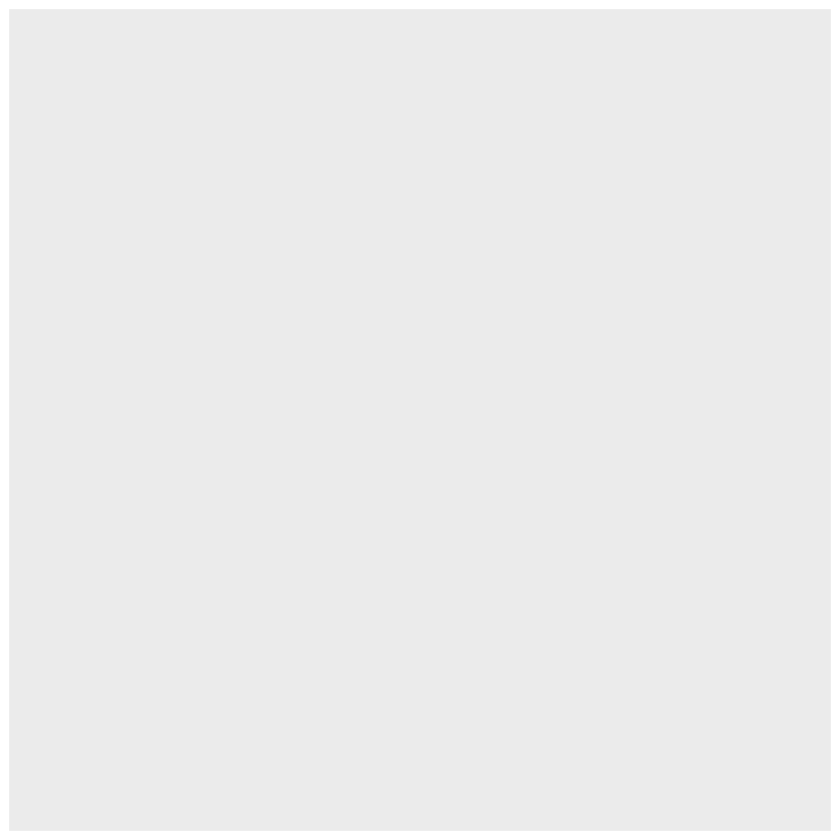

In [ ]:
# passing data into a ggplot to create an empty graph
ggplot(data = mpg)

3. `<MAPPINGS>` describes the aesthetics mappings you want to use for this particular geometry.
    - Generally, you pass your `<MAPPINGS>` to the `ggplot` through the `mappings` argument of `ggplot`.
    - You can also choose to pass your `<MAPPINGS>`through the `<GEOM_FUNCTION>`.

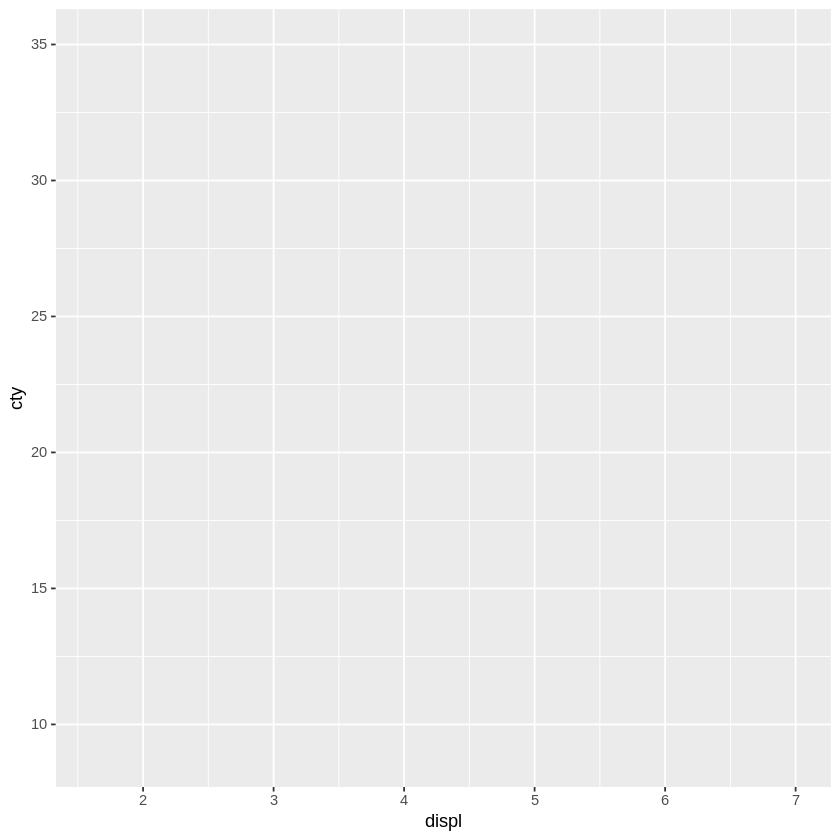

In [ ]:
# the x and y arguments of aes() specify
# which variables to map to the x and y axes.
ggplot(
  data = mpg,
  mapping = aes(x = displ, y = cty)
  )

4.  The `+` symbol is used to add a layer to your graphic.
    -   If your code spans multiple lines, then you need to make sure
        all lines but the last end with the `+` operator to stack the
        layers properly.


5.  The `<GEOM_FUNCTION>` indicates the geometric object you want to use in the plot. See below.
    -   One of the reasons `ggplot2` is so powerful is that you can use different mappings for different geometric objects.



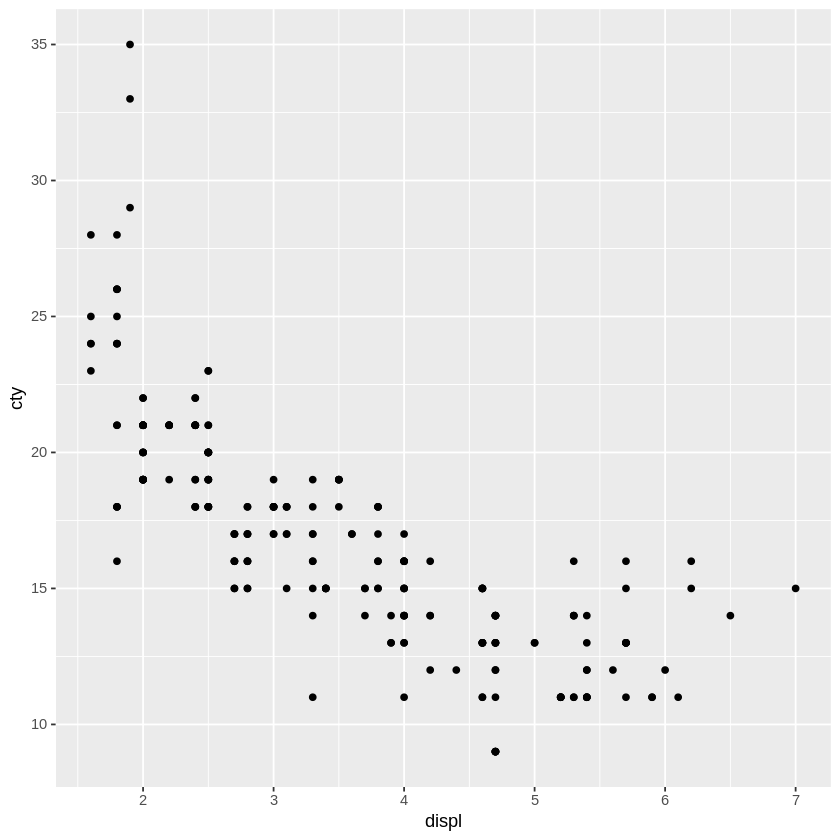

In [14]:
# geom_point() adds a layer of points to your plot which creates a scatterplot
ggplot(
  data = mpg,
  mapping = aes(x = displ, y = cty)
) +
  geom_point()

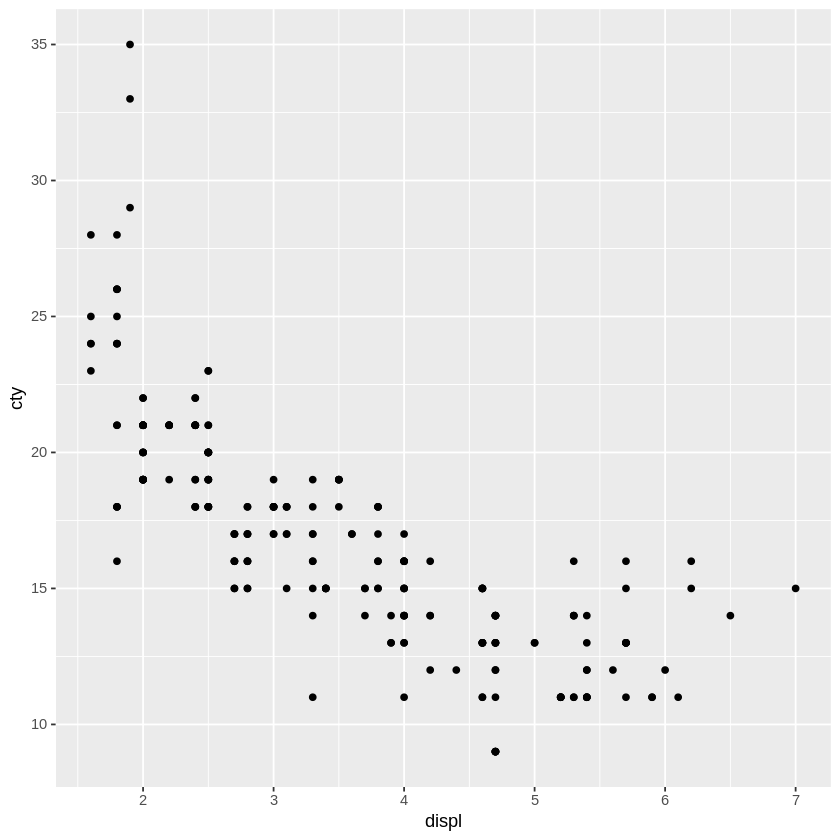

In [ ]:
# typically we trunicate the code by leaving off the data and mapping labels
ggplot(mpg, aes(x = displ, y = cty) +
  geom_point()

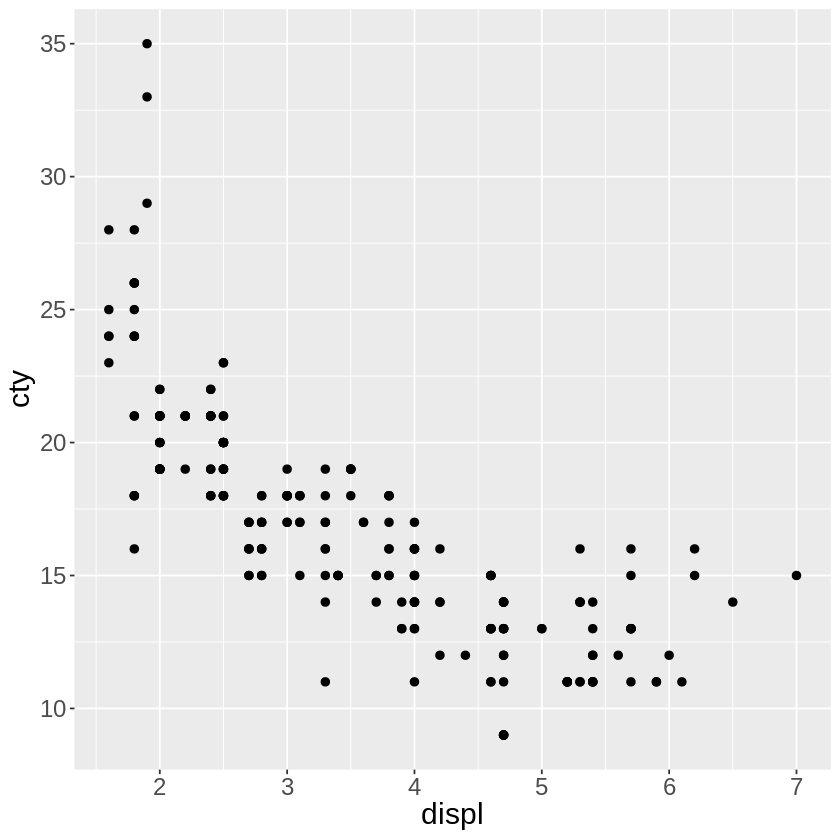

In [64]:
# we can customize all sorts of properties
# we will discuss these features later
ggplot(mpg, aes(x = displ, y = cty)) +
  geom_point(size = 2) +
  theme(text = element_text(size=18))

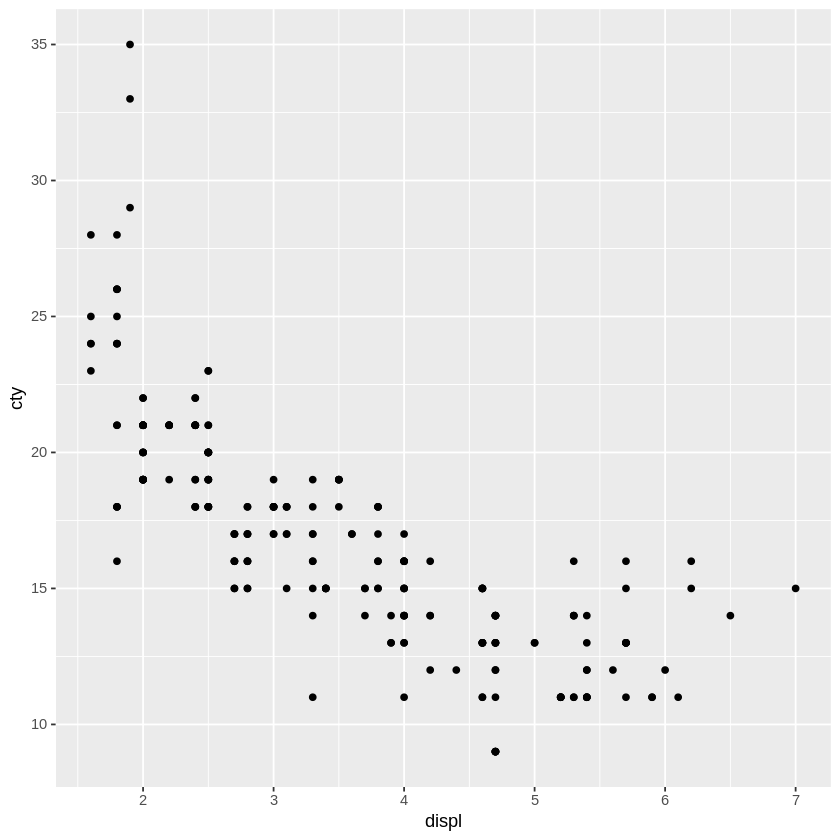

In [23]:
# it is also possible to pass mapping through geoms
ggplot(mpg) +
    geom_point(aes(x = displ, y = cty))

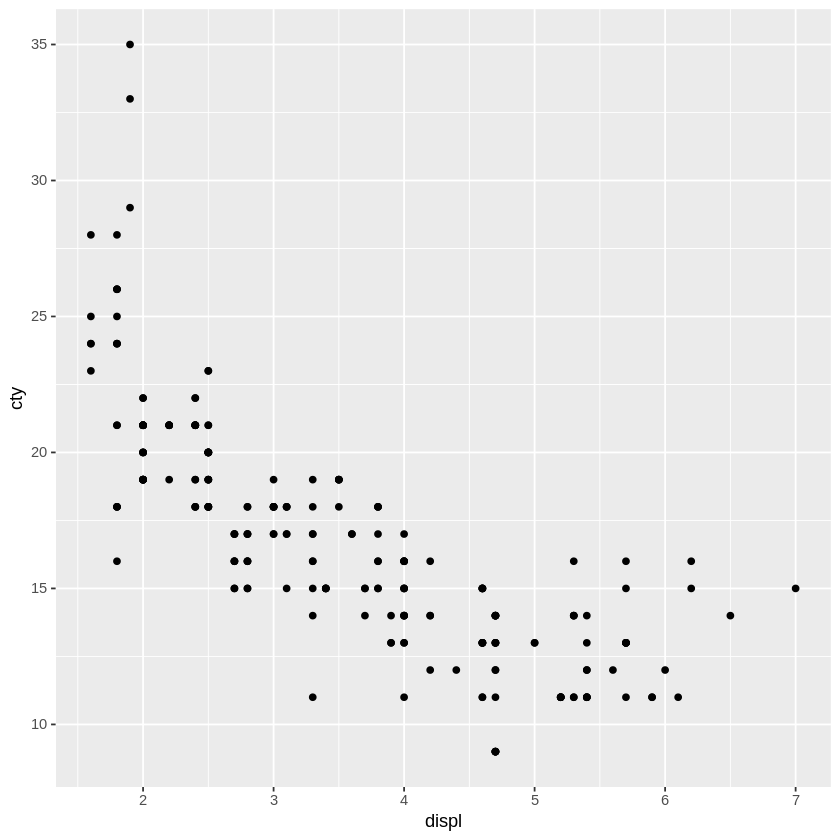

In [ ]:
# here is the original plot with concise code
ggplot(mpg, aes(x = displ, y = cty) +
  geom_point()

In [ ]:
# maybe we want to change the plot to explore other variables
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : Factor w/ 3 levels "4","f","r": 2 2 2 2 2 2 2 1 1 1 ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : Factor w/ 7 levels "2seater","compact",..: 2 2 2 2 2 2 2 2 2 2 ...


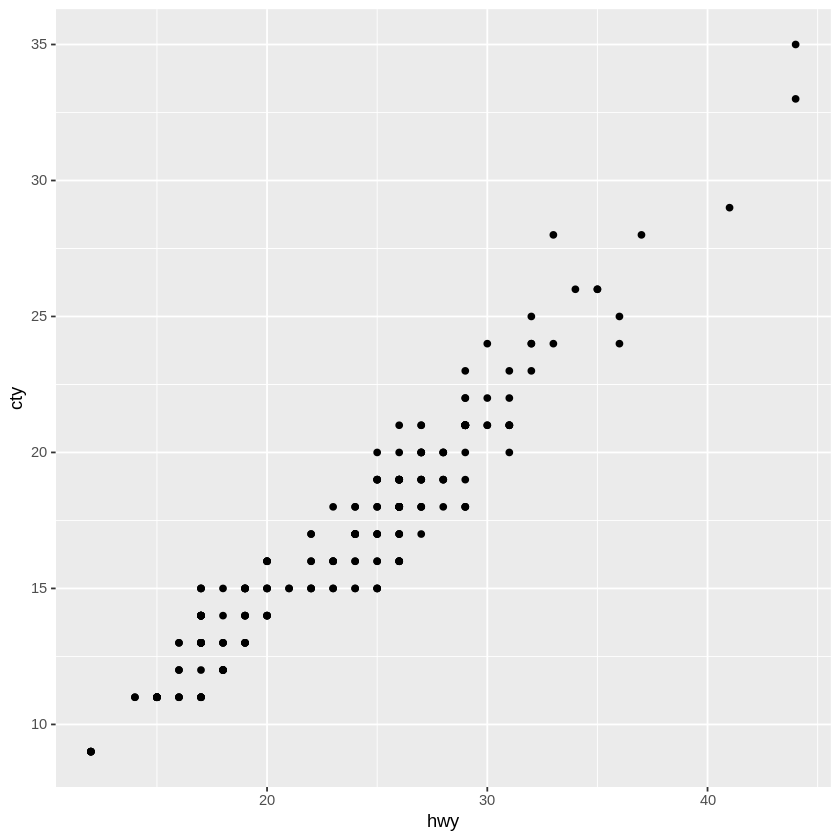

In [20]:
# very easy to change predictor variable on the x-axis
ggplot(mpg, aes(x = hwy, y = cty)) +
  geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


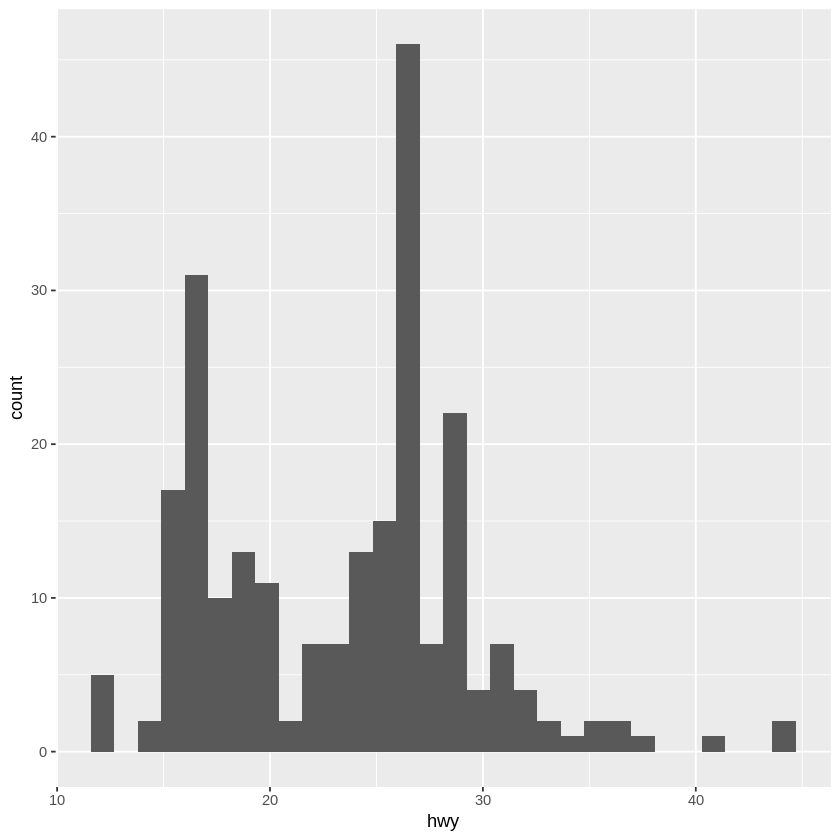

In [26]:
# we can change the plot entirely by changing the geom type
ggplot(mpg, aes(x = hwy)) +
  geom_histogram()

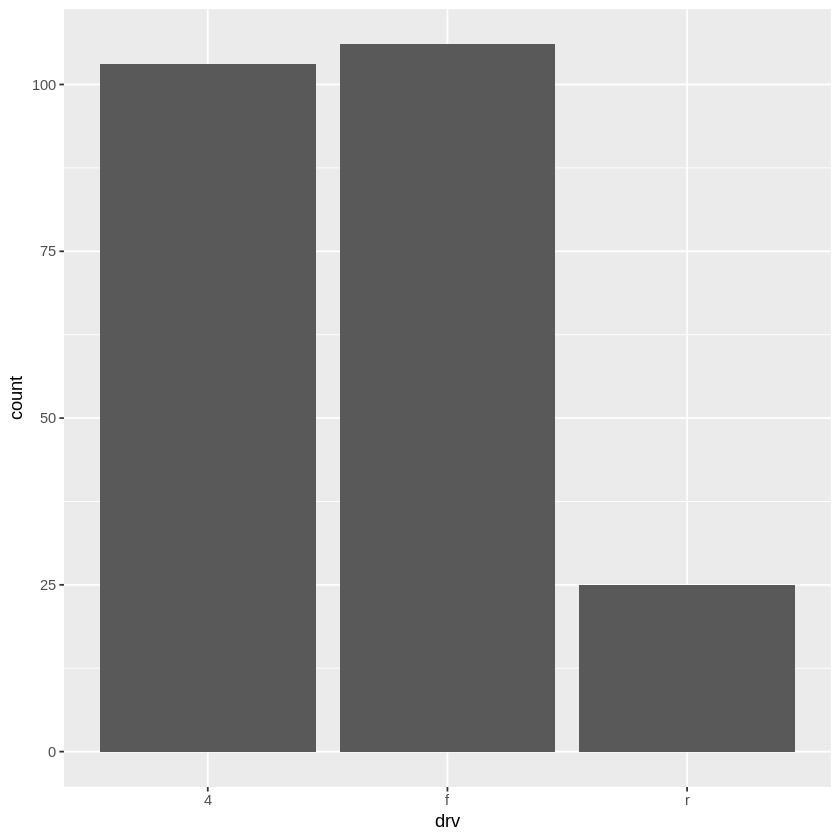

In [25]:
# we can change the plot entirely by changing the geom type
ggplot(mpg, aes(x = drv)) +
  geom_bar()

## <a name="geoms">A Dictionary of Common Geometric Objects</a>

---

There are many geometric objects available in **ggplot2**. A complete
list may be (currently) found at <https://ggplot2.tidyverse.org/reference/>. A partial list of geometric objects that are frequently used are found below.


| dimensionality | geometry | purpose  |
|----------------|----------|----------|
| 1d | `geom_bar` | Draws a bar chart.  |
| 1d | `geom_density` | Draws a density plot. |
| 1d | `geom_histogram`    | Draws a histogram. |
| 1d | `geom_boxplot`  | Draws a boxplot.  |
| 1d | `geom_violin`   | Draws a violin plot.  |
| 1d | `geom_qq`       | Draws a quantile-quantile plot.  |
| 2d | `geom_point`    | Draws points. Used for scatter plots.  |
| 2d | `geom_path`, `geom_line` | Connects observations. Used for line plots. |
| 2d | `geom_segment`  | Draws straight lines between points.  |
| 2d | `geom_curve`    | Draws curved lines between points.  |
| 2d | `geom_smooth`   | Draws a ‘smooth’ fitted model of the data. |
| 2d | `geom_density2d`  | Draws 2d contours of density estimate for two variables.  |
| 2d  | `geom_density2d_filled` | Draws 2d contours of density estimate for two variables with colors. |
| 3d | `geom_contour`  | Draws 2d contours of 3d data. |
| 3d | `geom_contour_filled`  | Draws 2d contours of 3d data (colored). |
| NA | `geom_abline`, `geom_hline`, `geom_vline` | Draws diagonal, horizontal, and vertical lines. |

Table 1: Common geometries provided by **ggplot2**.



## <a name="common-aes">A Dictionary of Common Aesthetic Mappings</a>

---

Aesthetic mappings are unique to each geometric object. Some of the most
common ones that show up in many geoms are provided below.

| aesthetic | purpose |
|-----------|---------|
| `x` | Controls the x-variable in the plot. |
| `y` | Controls the y-variable in the plot. |
| `alpha` | Controls the transparency of the object. |
| `color`, `colour` | Controls the colors of the object. |
| `fill` | Controls the color of the interior of an object. |
| `group` | Controls how the data are grouped. |
| `linetype` | Controls the type of line used to draw the object. |
| `size` | Controls the size of the drawn object. |
| `shape` | Controls the shape of the object. |

Table 2: Common aesthetics provided by **ggplot2**.



# <a name="palmer-intro">Palmer Penguins Data</a>

---

To learn how to plot with `ggplot2`, we need data! We will use the `penguins` data set in the `palmerpenguins` package (Horst, Hill, and Gorman 2022) to illustrate some of the ways that `ggplot2` can be used.


The `penguins` data set in the `palmerpenguins` package provides data related to various penguin species measured in the Palmer Archipelago (Antarctica), originally provided by Gorman, Williams, and Fraser<sup>3</sup>. We start by loading the data into memory.

<br>  

<font size="-1">3. Originally published in: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081</font>

## <a name="about-palmer">About the Data</a>

---

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). Size measurements for adult foraging penguins near Palmer Station include the following variables:

- `species`: a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
- `island`: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- `bill_length_mm`: a number denoting bill length  (millimeters)
- `bill_depth_mm`: a number denoting bill depth (millimeters)
- `flipper_length_mm`: an integer denoting flipper length (millimeters)
- `body_mass_g`: an integer denoting body mass (grams)
- `sex`: a factor denoting penguin sex (female, male)
- `year`: an integer denoting the study year (2007, 2008, or 2009)

<br>  

*Note: Be sure you have already installed and loaded the `palmerpenguins` package. If not, go back to the section [Loading and Installing Required Packages](#packages) and be sure to do so before continuing.*


In [ ]:
######################################################################
# you only need to run these commands once during an active R session
# only run if you are starting session for the first time
######################################################################
#install.packages("palmerpenguins")
#library(palmerpenguins)
#library(ggplot2)

In [ ]:
?penguins

In [ ]:
summary(penguins)

In [ ]:
str(penguins)

In [ ]:
head(penguins)

## <a name="quest1">Question 1</a>

---

How many observations are in the `penguins` data frame? Verify categorical variables being stored correctly.


<br>  


### Solution to Question 1

---

There are <mark>??</mark> observations.

<br>  
<br>  



## <a name="quest2">Question 2</a>

---

Use the plot function in base R to create the following plots:

- A plot showing the distribution of the number of observations made on each island.

- A plot showing the distribution of body mass of the penguins in the data set.


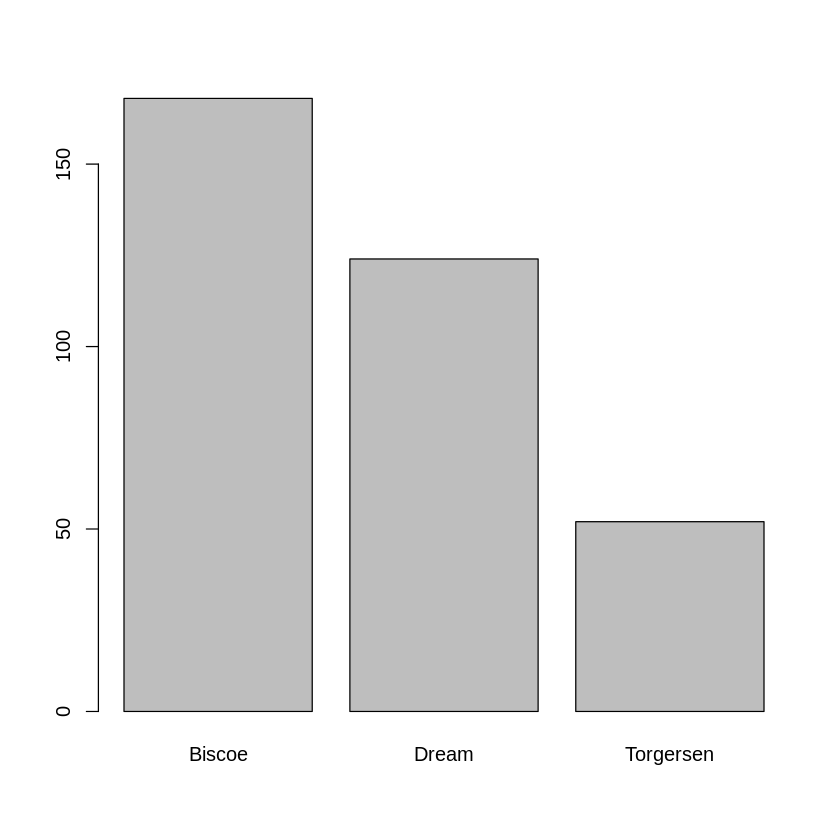

In [ ]:
plot(penguins$island)

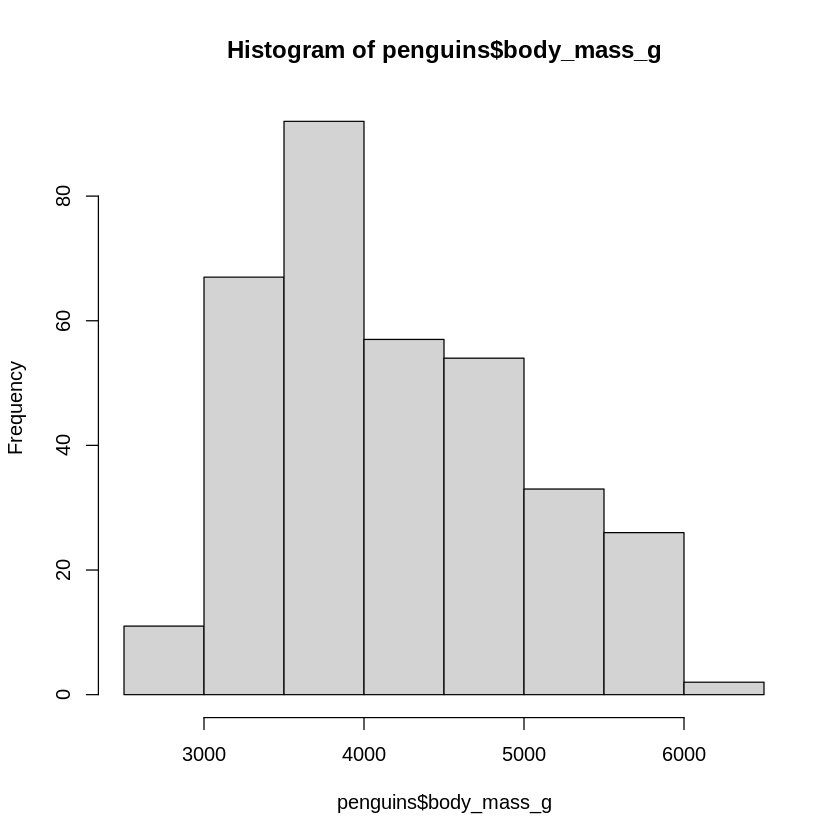

In [ ]:
hist(penguins$body_mass_g)

# <a name="bar-chart">Bar Plots</a>

---

A bar plot (also called a bar chart) uses bars to indicate the number of observations, called the **count** or **frequency**, in each level of a `factor`. In `ggplot2()`,


- Use the `geom_bar()` to construct bar plots.
- A bar plot is used to visually summarize a categorical variable.


## <a name="quest3">Question 3</a>

---

Construct a bar plot of the `species` variable in the `penguins` data frame.


<br>  


## <a name="bar-fill">Changing Color of Bars</a>

---

To change the color of the bars, we can set the `fill` aethestic inside `geom_bar()` to our color of choice.

- See <https://r-graph-gallery.com/ggplot2-color.html> for a guide of R colors.

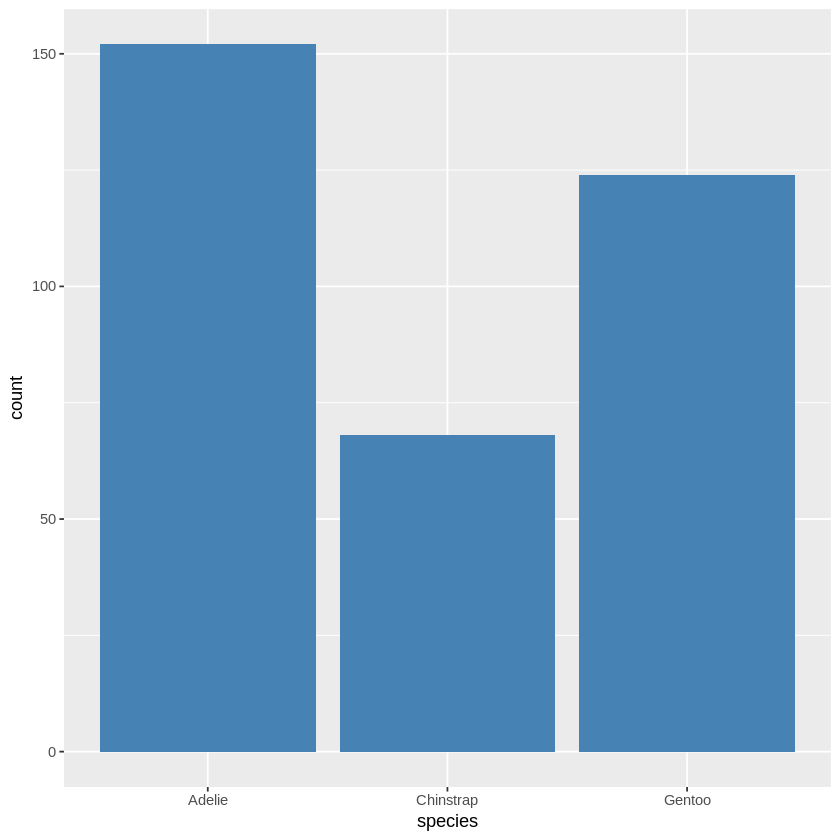

In [69]:
ggplot(penguins, aes(x = species)) +
  geom_bar(fill = "steelblue")

We can set a different color for each bar by setting the `fill` aesthetic equal to the `species` variable **inside the aesthetic mapping** as opposed to inside the `geom_bar()` command. By default, this adds a legend to the plot.


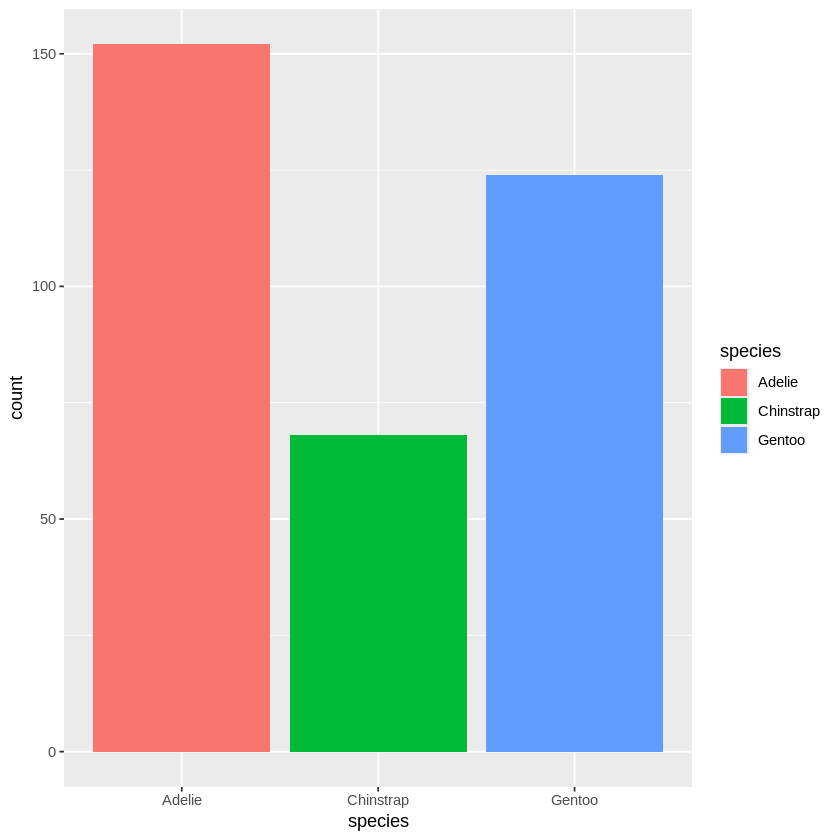

In [71]:
ggplot(penguins, aes(x = species, fill = species)) +
  geom_bar()

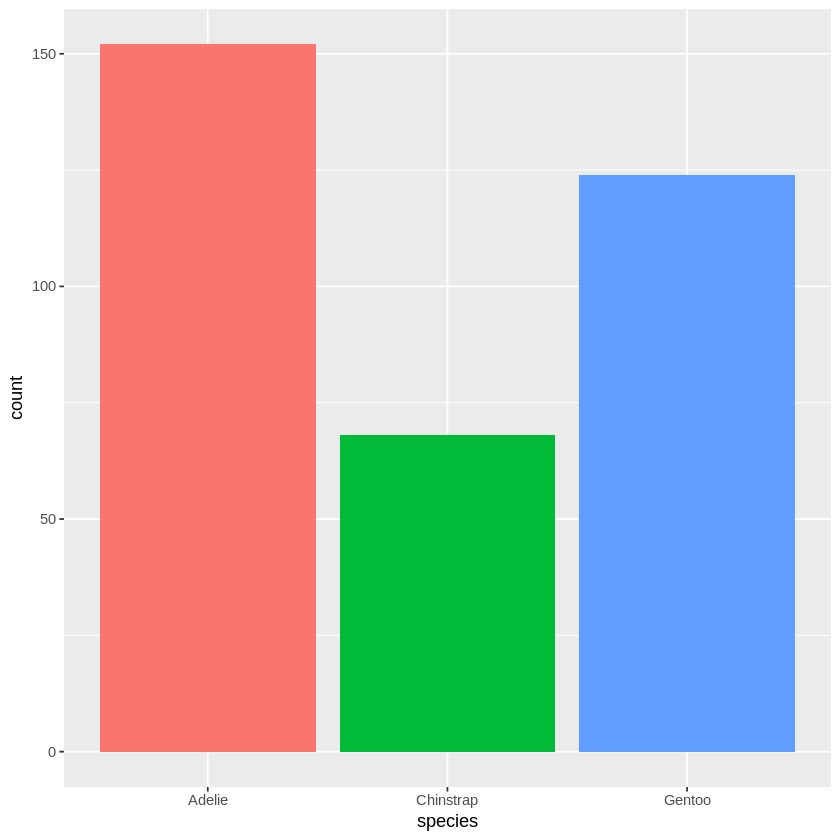

In [72]:
ggplot(penguins, aes(x = species, fill = species)) +
  geom_bar() +
  theme(legend.position = "none")  # remove legend from plot

### <a name="scaling">Scaling</a>

---

When a variable is mapped to an aesthetic, `ggplot2` will assign a
unique value to each unique level of the variable. This process is known
as <font color="dodgerblue">**scaling**</font>. Scaling is often not very exciting, but it can be important when
customizing the look of a `ggplot`. When a variable is mapped to a non `x` or `y` aesthetic, `ggplot2` will automatically add a legend to indicate how the variable was scaled.

- When we set the fill color using `geom_bar(fill = "steelblue")` there was no scaling since this was not done inside the aesthetic mapping. *No legend was created.*
- Scaling did occur when we set the fill color in the aesthetic mapping with `aes(x = species, fill = species)`. A legend was created.


## <a name="titles">Adding Titles to Axes and Plot</a>

---

We can use the `labs()` command to modify labels on a `ggplot`. According to [official `ggplot2` label documentation](https://ggplot2.tidyverse.org/reference/labs.html):

> Good labels are critical for making your plots accessible to a wider audience. Always ensure the axis and legend labels display the full variable name. Use the plot title and subtitle to explain the main findings. It's common to use the caption to provide information about the data source. tag can be used for adding identification tags to differentiate between multiple plots.

See [`labs()` documentation](https://ggplot2.tidyverse.org/reference/labs.html) for more details.

<br>

We can change the font type, size of axis labels, the main title, values on the axis, the legend, and all sorts of components of a plot using the `theme()`. According to `ggplot2` documentation on `theme()`:

> Themes are a powerful way to customize the non-data components of your plots: i.e. titles, labels, fonts, background, gridlines, and legends. Themes can be used to give plots a consistent customized look.

- See [`theme()` documentation](https://ggplot2.tidyverse.org/reference/theme.html) for more details.


In [97]:
?labs

In [98]:
?theme

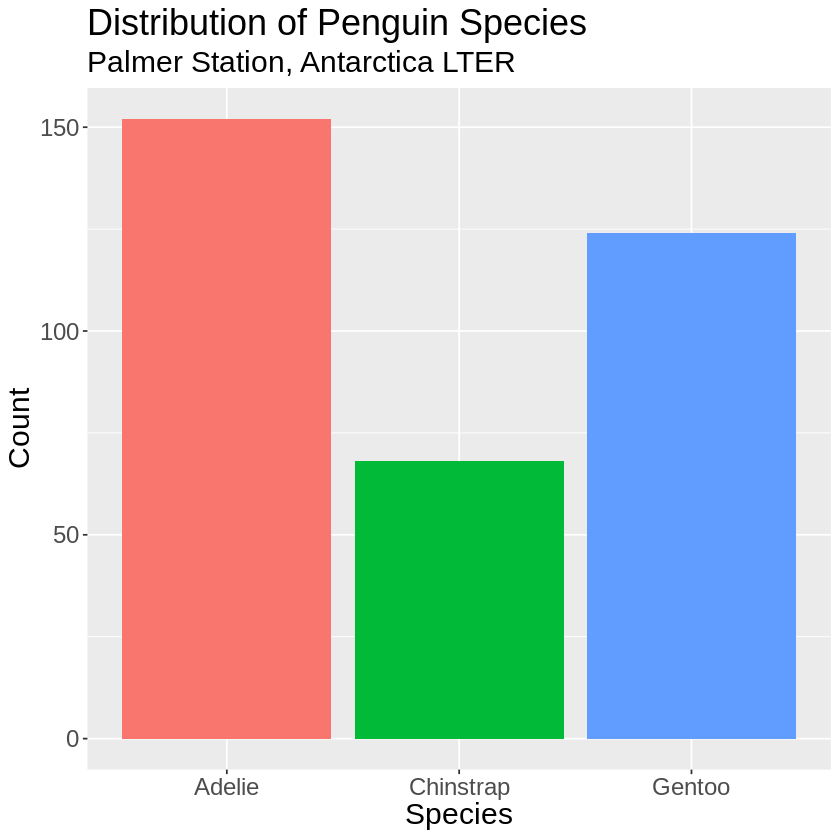

In [96]:
ggplot(penguins, aes(x = species, fill = species)) +
  geom_bar() +
  theme(legend.position = "none") +  # remove legend from plot
  labs(
    title = "Distribution of Penguin Species",  # add main title
    subtitle = "Palmer Station, Antarctica LTER",  # add subtitle
    x = "Species", y = "Count",  # add label on each axis
  ) +
  theme(text = element_text(size=18))  # increase font size

## <a name="bar-relative">Plotting Relative Frequencies</a>

---

The bar plot above display the variable `species` on the $x$-axis, but no variable from `penguins` is being displayed in the $y$-axis. Instead, the count is being displayed, and the count is statistic that is being computed based on the values stored in `penguins$species`.

Graphs such as bar plots and histograms calculate new values (such as counts) to plot on the $y$-axis rather than use variables from a data frame to plot on the $y$-axis. Other plots, such as scatter plots, plot values of another variable in the data frame along the $y$-axis.

The algorithm used to calculate the values plotted on an axis of a graph is called a `stat`, which stands for statistical transformation. Running the code cell below opens the help documentation for `geom_bar` where we learn the following:

> `geom_bar()` uses `stat_count()` by default: it counts the number of cases at each x position.



In [46]:
?geom_bar

To change the statistic on the $y$-axis from the default count to proportion we can manually set the `y` aesthetic to:

- `y = after_stat(prop)` and
- add the option `group = 1`.

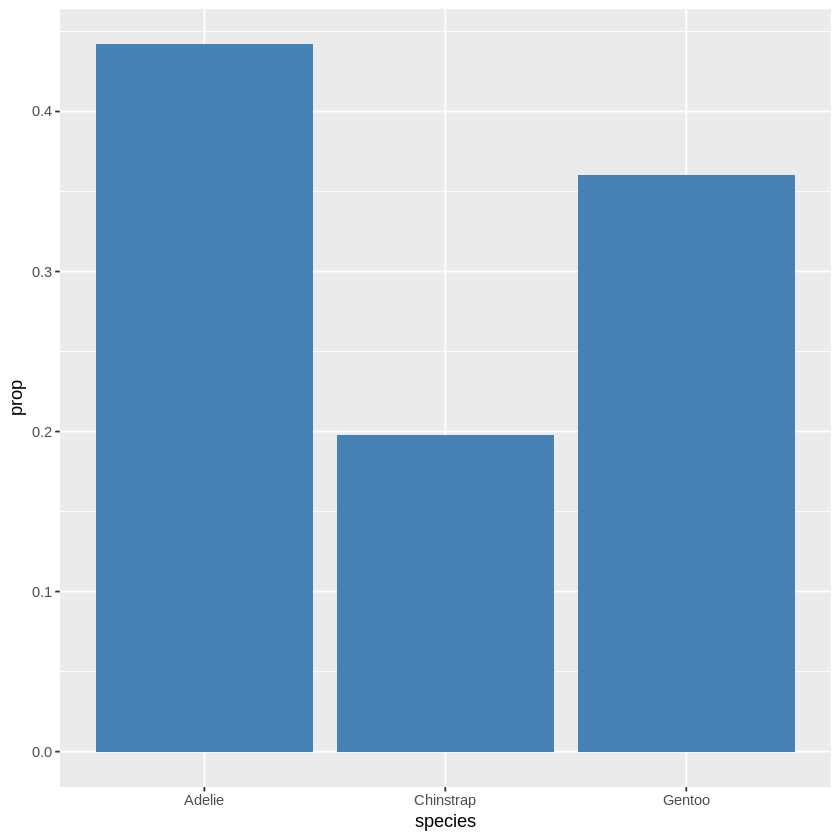

In [99]:
ggplot(penguins, aes(x = species, y = after_stat(prop), group = 1)) +
  geom_bar(fill = "steelblue")

## <a name="quest4">Question 4</a>

---

Why did we add the `group = 1` option when creating the previous relative frequency bar plot? Try removing the option and see what happens to the result.

<br>




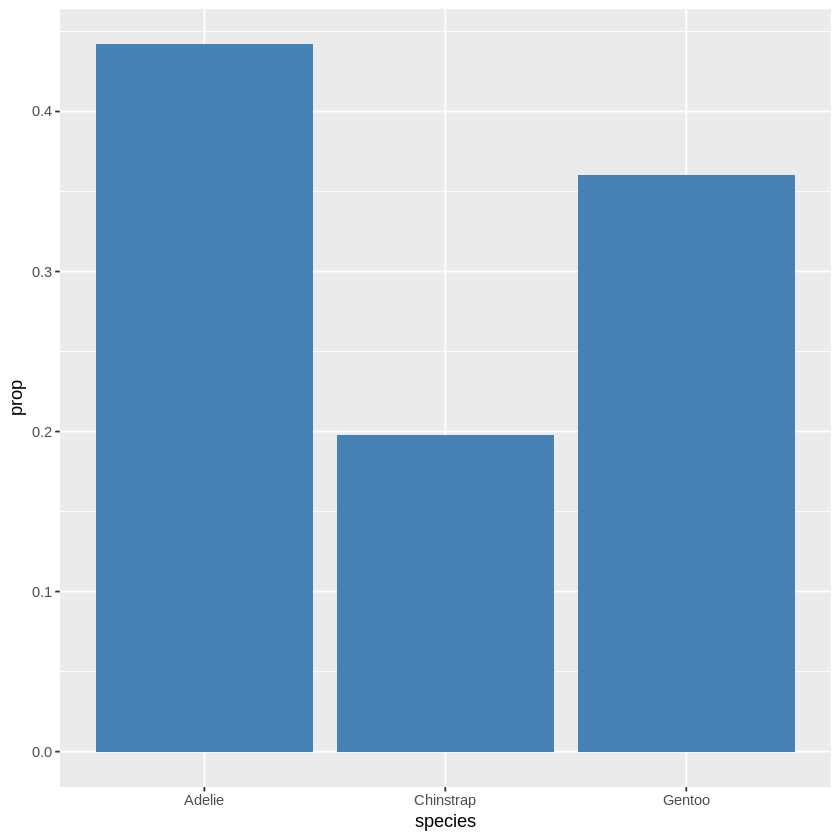

In [100]:
ggplot(penguins, aes(x = species, y = after_stat(prop), group = 1)) +
  geom_bar(fill = "steelblue")

### <a name="sol4">Solution to Question 4</a>

---



<br>  
<br>  


## <a name="finished-bar">A Clean Bar Plot</a>

---

Below is an example of a possible "clean" looking bar plot generated by `ggplot2`.


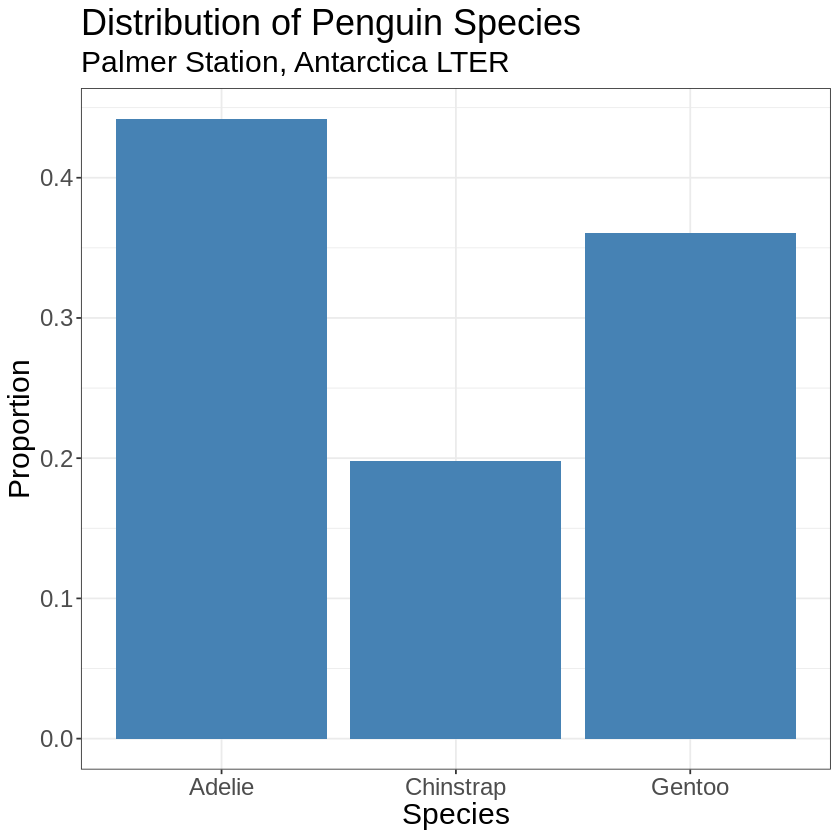

In [156]:
ggplot(penguins, aes(x = species, y = after_stat(prop), group = 1)) +
  geom_bar(fill = "steelblue") +
  theme(legend.position = "none") +  # remove legend from plot
  labs(
    title = "Distribution of Penguin Species",  # add main title
    subtitle = "Palmer Station, Antarctica LTER",  # add subtitle
    x = "Species", y = "Proportion",  # add label on each axis
  ) +
  theme_bw() +  # remove gray panel in background
  theme(text = element_text(size=18))  # increase font size

# <a name="histogram">Histograms</a>

---


A <font color="dodgerblue">**histogram**</font> is used to display the distribution of a continuous `numeric` variable. The range of the variable is partitioned into classes. The number of observations falling in each class is counted. A histogram draws a bar for each class with height corresponding to the number of observations in that class.

- Use `geom_histogram()` to construct a histogram.
- A histogram is used to visually summarize a numeric variable.

## <a name="quest5">Question 5</a>

---

Construct a histogram of the `bill_length_mm` variable in the `penguins` data frame. If you received warning message(s), what do you think they are referring to?


<br>  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


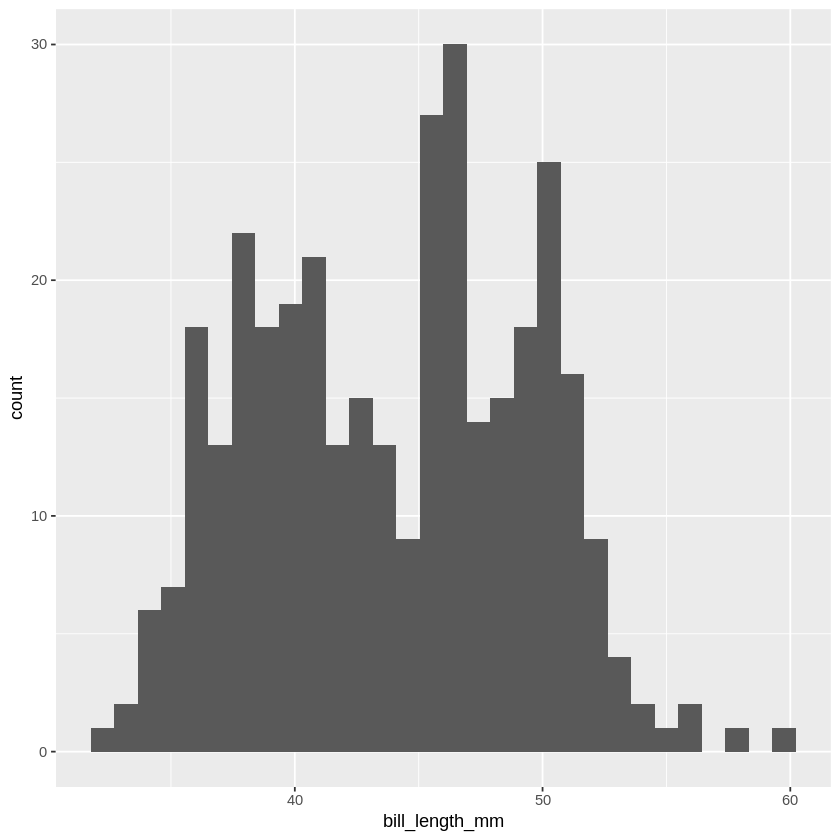

In [118]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram()

In [113]:
summary(penguins$bill_length_mm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  32.10   39.23   44.45   43.92   48.50   59.60       2 

### <a name="sol5">Solution to Question 5</a>

---






<br>  
<br>  



## <a name="quest6">Question 6</a>

---

Run `?geom_histogram` to access help documentation and address the issues raised in the warning message(s) from [Question 5](#quest5).

In [122]:
?geom_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


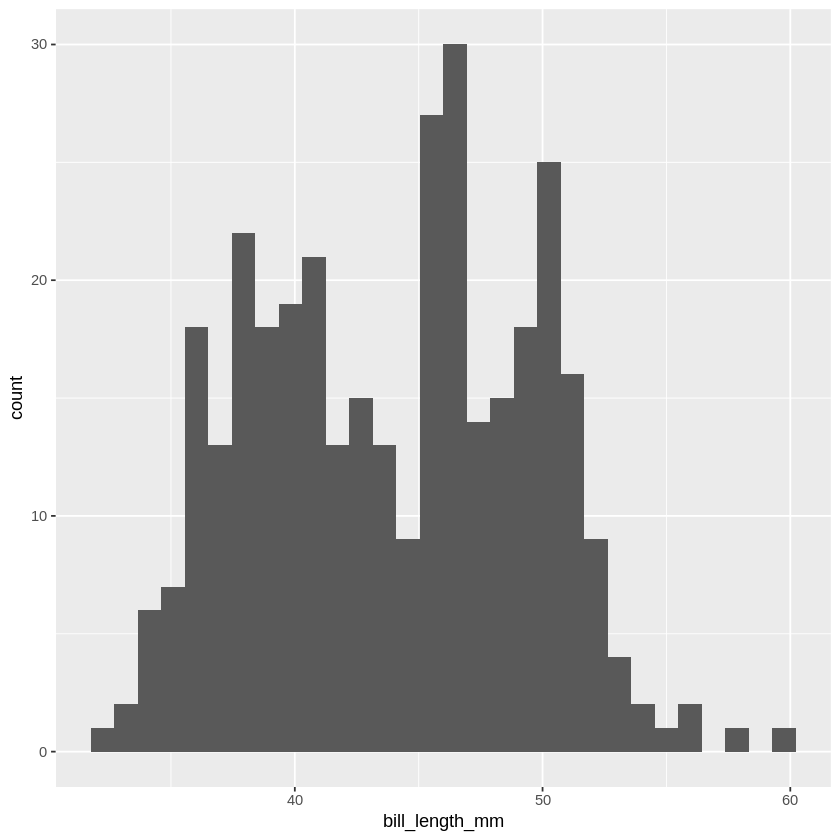

In [121]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram(na.rm = TRUE)  # removes missing values when creating histogram

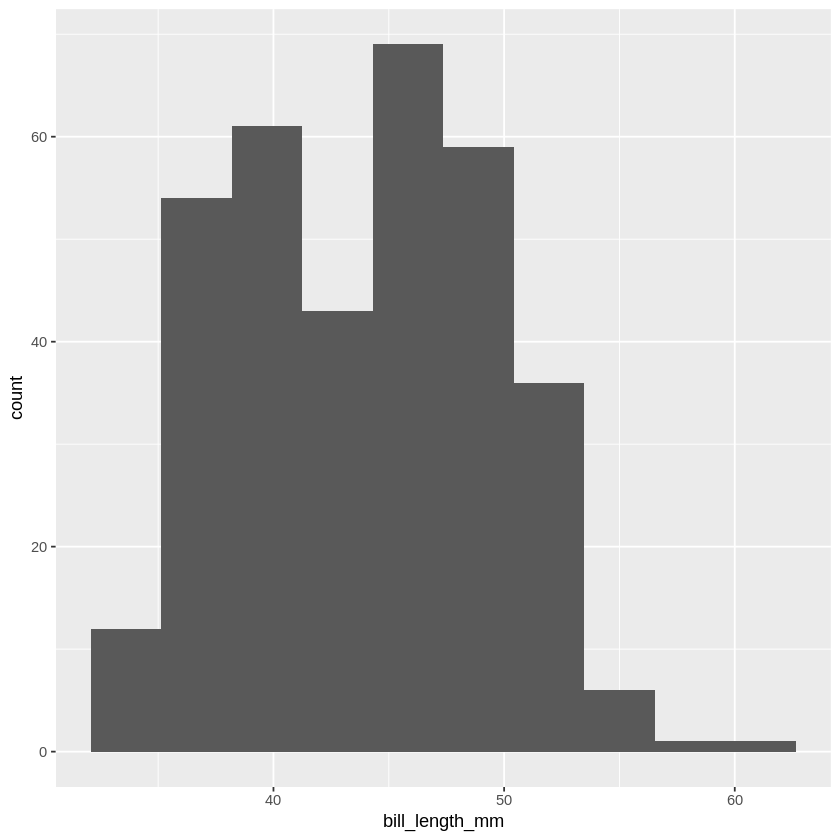

In [123]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram(
    na.rm = TRUE,  # removes missing values when creating histogram
    bins = 10  # sets number of bins to 10
    )

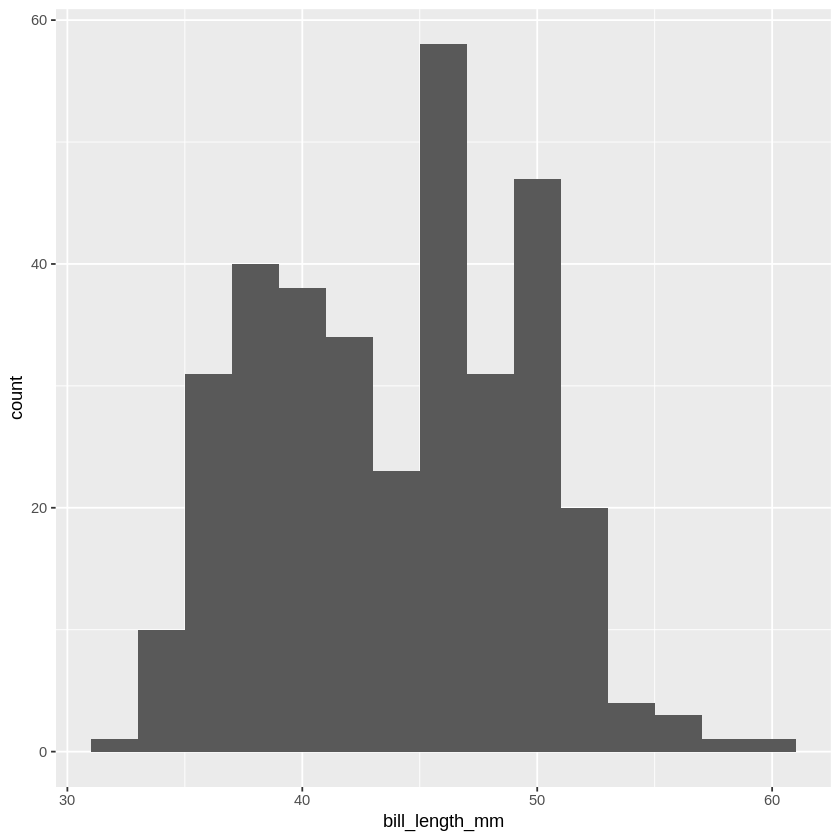

In [126]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram(
    na.rm = TRUE,  # removes missing values when creating histogram
    binwidth = 2  # sets width of each bin to 2 mm
    )

## <a name="change-bins">Changing the Bin Width or Number of Bins</a>

---

In [Question 6](#quest6), we see that we can change the number of bins used in a histogram by:

- Setting the width of each bin with the `binwidth` option in `geom_histogram()`, or
- Setting the number of bins with the `bins` option in `geom_histogram()`.


## <a name="bar-fill">Changing Color of Bars and Outlines</a>

---

To change the color of the bars, we can set the `fill` aethestic inside `geom_histogram()` to our color of choice. To set/change the color of the outline of the bars, we can set the `color` aethestic inside `geom_histogram()` to our color of choice.


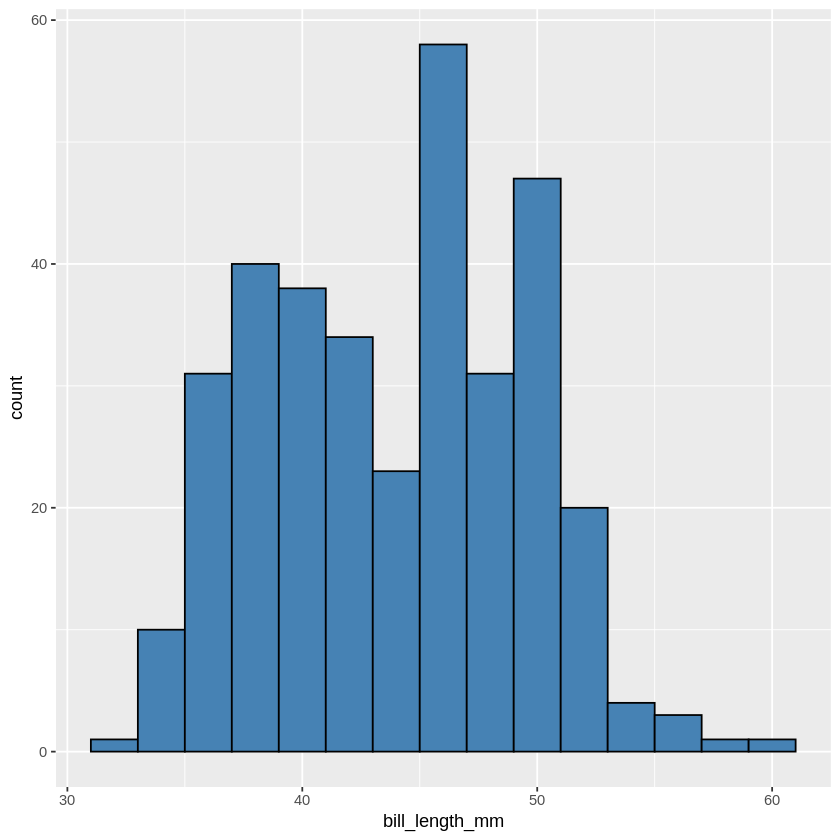

In [134]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram(
    na.rm = TRUE,  # removes missing values when creating histogram
    binwidth = 2,  # sets width of each bin to 2 mm
    fill = "steelblue",  # set fill color to steelblue
    color = "black"  # set ouline color to black
    )

## <a name="custom-axes">Customizing Axis Scales</a>

---

The default scales chosen for the $x$ and/or $y$-axis may not be the best choice. For example:

- We may want the $x$-axis scale to more clearly indicate the endpoints of each bin range.
- We may wish to increase the accuracy of the tickmarks on the $y$-axis.

We can customize the location of the tickmarks on each axis by adding position scales to our `ggplot`. See [help documentation for position scales for continuous data](https://ggplot2.tidyverse.org/reference/scale_continuous.html) for more details.

- `scale_x_continuous(breaks = x)` sets the breaks on the $x$-axis where `x` is a numeric vector.
- `scale_y_continuous(breaks = y)` sets the breaks on the $y$-axis where `y` is a numeric vector.



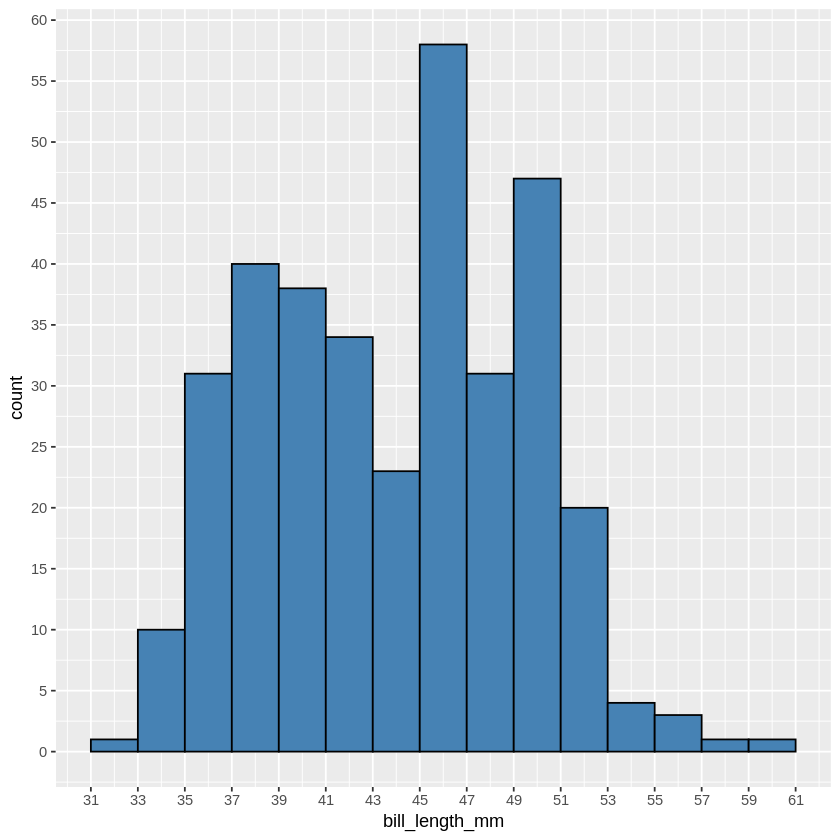

In [140]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram(
    na.rm = TRUE,  # removes missing values when creating histogram
    binwidth = 2,  # sets width of each bin to 2 mm
    fill = "steelblue",  # set fill color to steelblue
    color = "black"  # set ouline color to black
    ) +
  scale_x_continuous(breaks = seq(31, 61, by = 2)) +  # customize ticks on x-axis
  scale_y_continuous(breaks = seq(0, 60, by = 5))  # customize ticks on y-axis

## <a name="finished-bar">A Clean Histogram</a>

---

Below is an example of a possible "clean" looking bar plot generated by `ggplot2`.


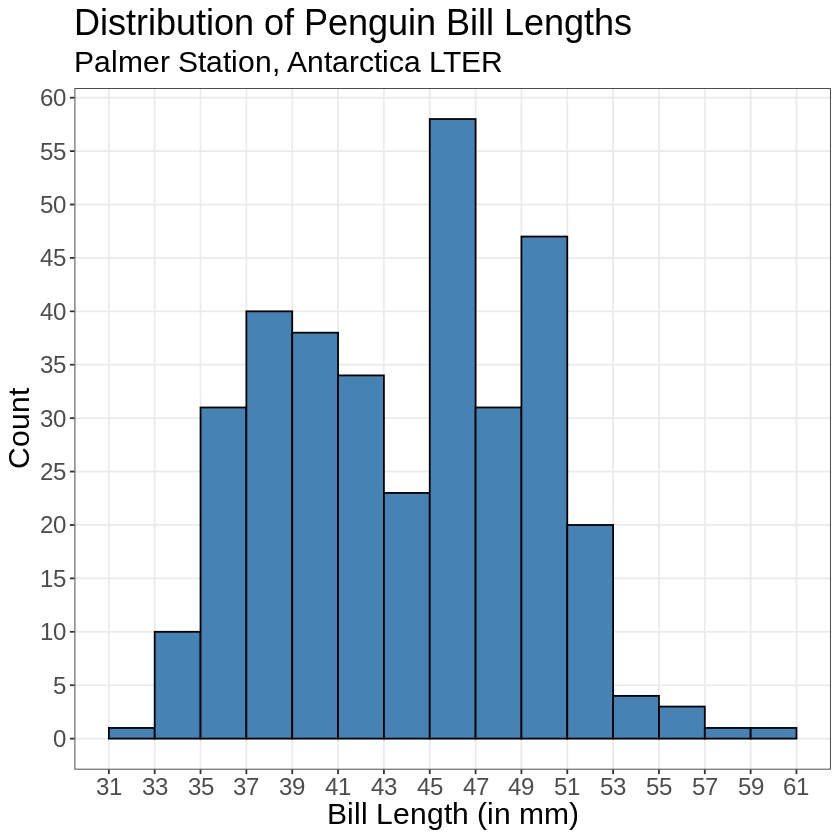

In [158]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_histogram(
    na.rm = TRUE,  # removes missing values when creating histogram
    binwidth = 2,  # sets width of each bin to 2 mm
    fill = "steelblue",  # set fill color to steelblue
    color = "black"  # set ouline color to black
    ) +
  scale_x_continuous(breaks = seq(31, 61, by = 2)) +  # customize ticks on x-axis
  scale_y_continuous(breaks = seq(0, 60, by = 5)) +  # customize ticks on y-axis
  labs(
    title = "Distribution of Penguin Bill Lengths",  # add main title
    subtitle = "Palmer Station, Antarctica LTER",  # add subtitle
    x = "Bill Length (in mm)", y = "Count",  # add label on each axis
  ) +
  theme_bw() +  # remove gray panel in background
  theme(
    panel.grid.minor = element_blank(),  # remove minor gridlines
    text = element_text(size=18)  # increase font size
  )

## <a name="hist-dig">Digging Deeper into the Data</a>

---

The `bill_length_mm` histogram is multimodal (i.e., has multiple prominent peaks), having 2 or 3 prominent peaks. There may be sub-populations we should
distinguish. It isn't easy to identify sub-populations with histograms
unless the sub-populations are split into separate histograms (which we
will learn to do later with *facets*) or to make the bars semi-transparent for the different sub-populations.



# <a name="density">Density Plots</a>

---


A <font color="dodgerblue">**density plot**</font> is often preferred to a histogram because it's more flexible, though it often provides similar information. A density plot is essentially a smoothed version of a relative frequency histogram.

A density plot is appropriate for displaying the distribution of a
continuous `numeric` variable and indicates the values for which the
data is more “dense”. More specifically, density plots indicate the
values of data you are most likely to observe. A higher density region
means you are more likely to observe data with values in that region.

- Use `geom_density()` to construct a density plot.
- A density plot is used to visually summarize a numeric variable.


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


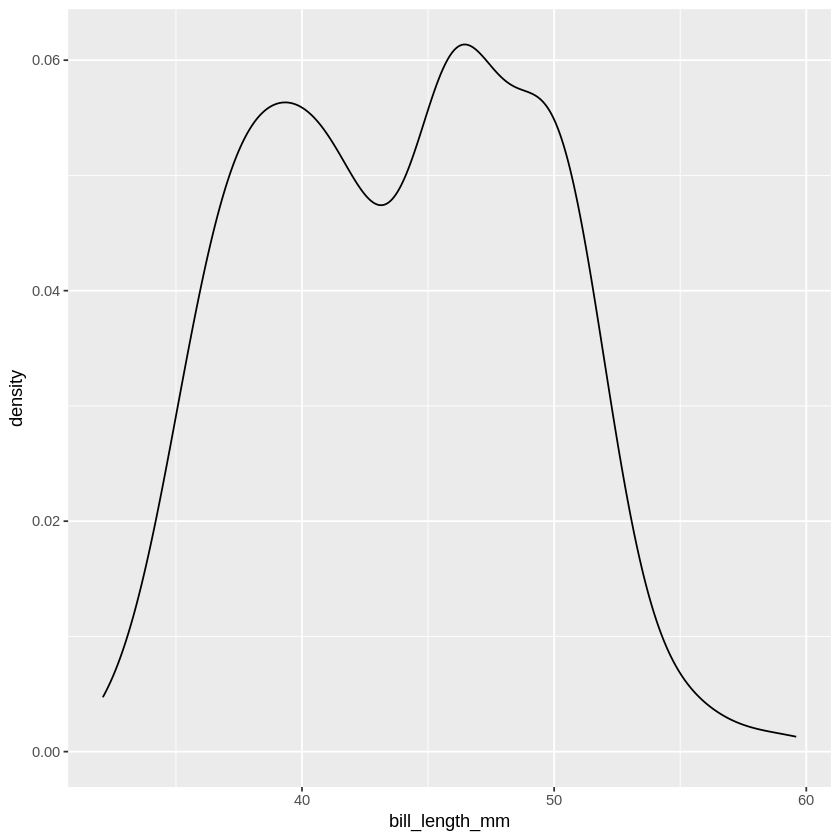

In [159]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_density()

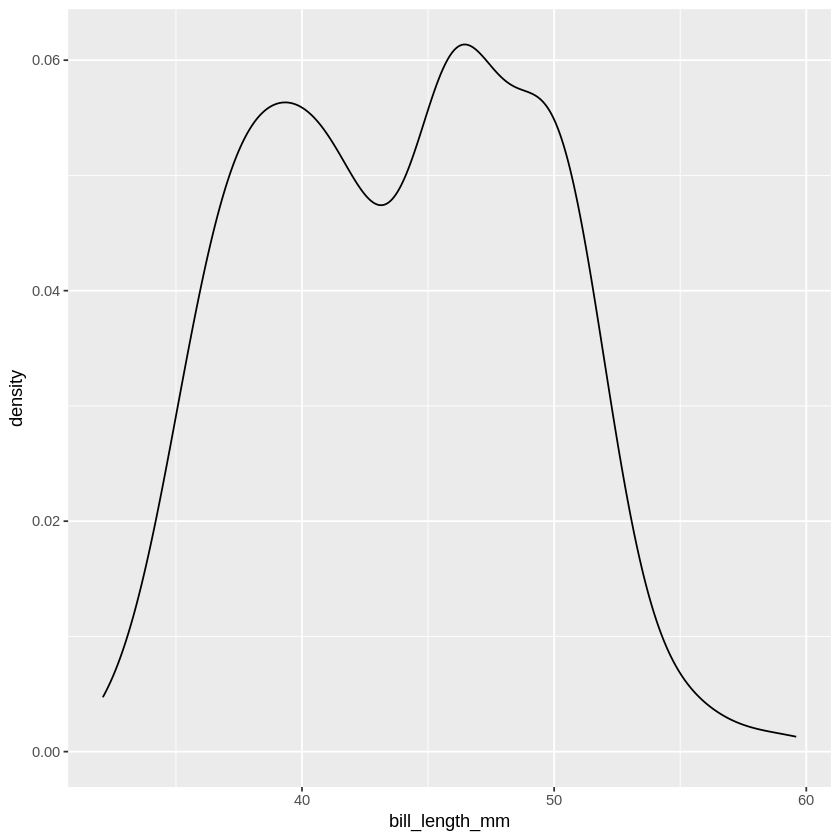

In [160]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_density(na.rm = TRUE)

## <a name="density-color">Adding A Color Aesthetic to a Density Plot</a>

---

There are at least two modes in the `bill_length_mm` density plot. Let's create separate densities for the different penguin species by specifying the `color` aesthetic to *scale* different colors to the different levels of `species`.

- Notice *scaling* occurs since we set the color inside the aesthetic mapping.
- A legend is therefore created!

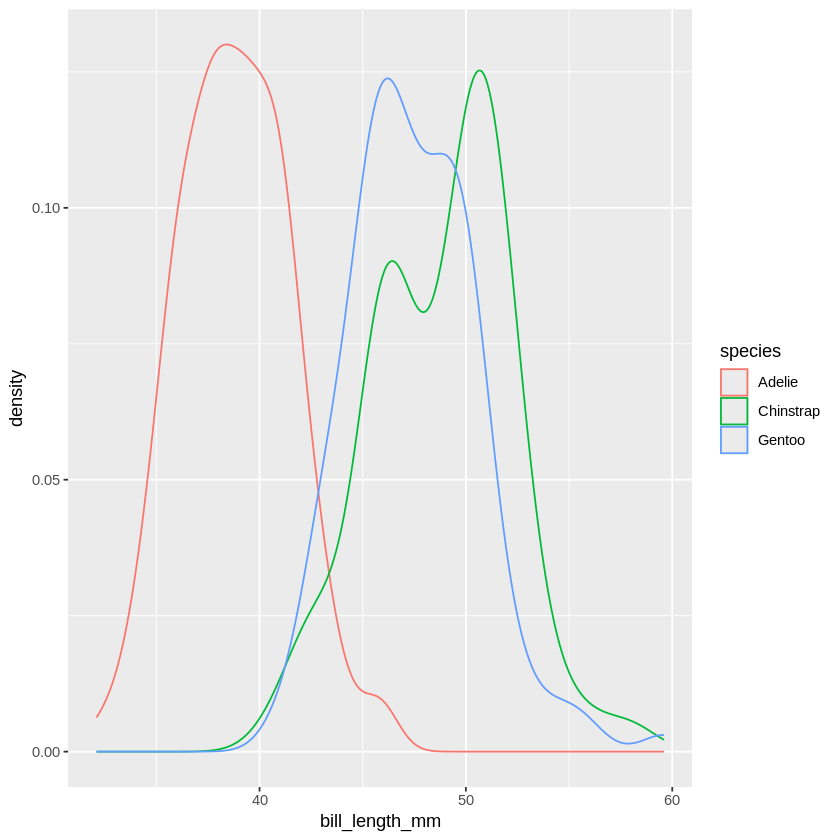

In [168]:
ggplot(penguins, aes(x = bill_length_mm, color = species)) +
  geom_density(na.rm = TRUE)

There are clear differences in the bill length of Adelie, Chinstrap, and
Gentoo penguins. The bill length for the Adelie penguins is about 35 mm
and closer to 47 mm for the Gentoo penguins. The Chinstrap penguins have
the greatest bill length, in general. It appears the Chinstrap penguins
may have a further sub-population.




## <a name="density-linetype">Adjusting the Line Type</a>

---

A weakness of the previous graphic is that the legend distinguishing the
different `species` is a bit subtle. The colored line around the border
may not be easy to distinguish for everyone. We could use a different
`linetype` for each species or we could use different `color` and
`linetype` for each species. We consider the different results below.

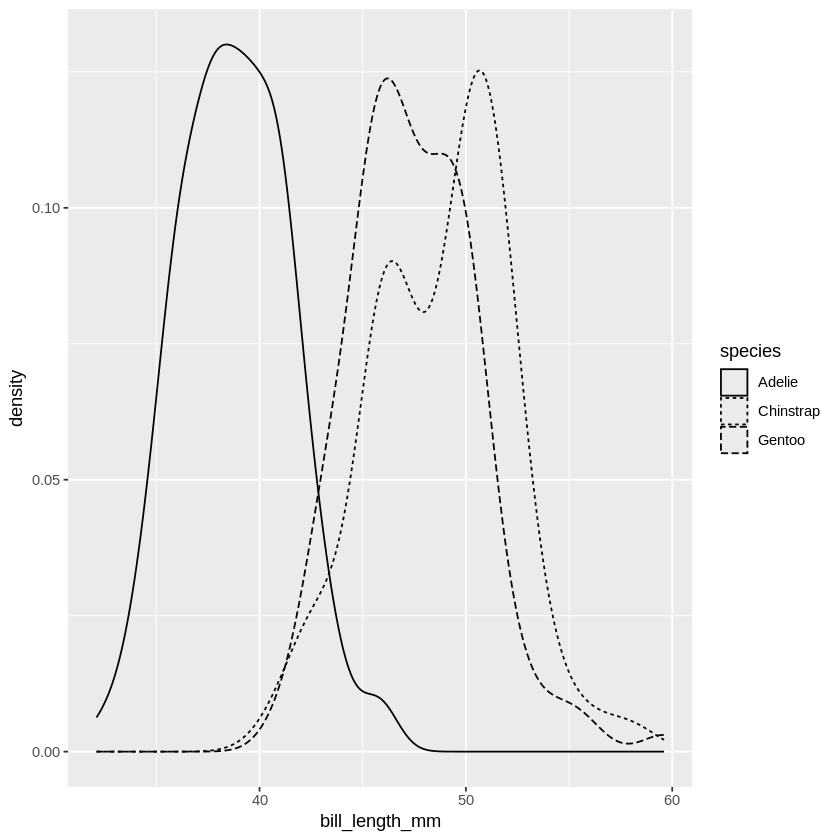

In [170]:
ggplot(penguins, aes(x = bill_length_mm, linetype = species)) +
  geom_density(na.rm = TRUE)

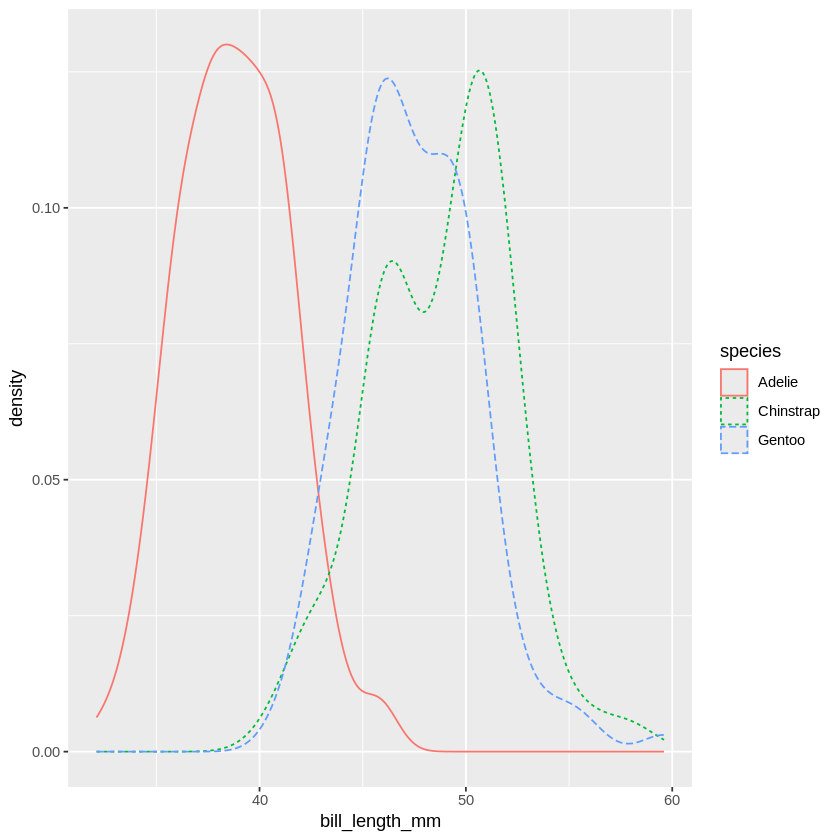

In [171]:
ggplot(penguins, aes(x = bill_length_mm, color = species, linetype = species)) +
  geom_density(na.rm = TRUE)

## <a name="density-linetype">Adjusting the Fill Color</a>

---

A weakness of the previous graphic is that the legend distinguishing the
different `species` is a bit subtle. The colored line around the border
may not be easy to distinguish for everyone. We could use a different
`linetype` for each species or we could use different `color` and
`linetype` for each species. We consider the different results below.

## <a name="density-linetype">Adjusting the Fill Color</a>

---

Another option is to `fill` the densities for each species with different colors. However, the density curves will overlap, masking some of the information.

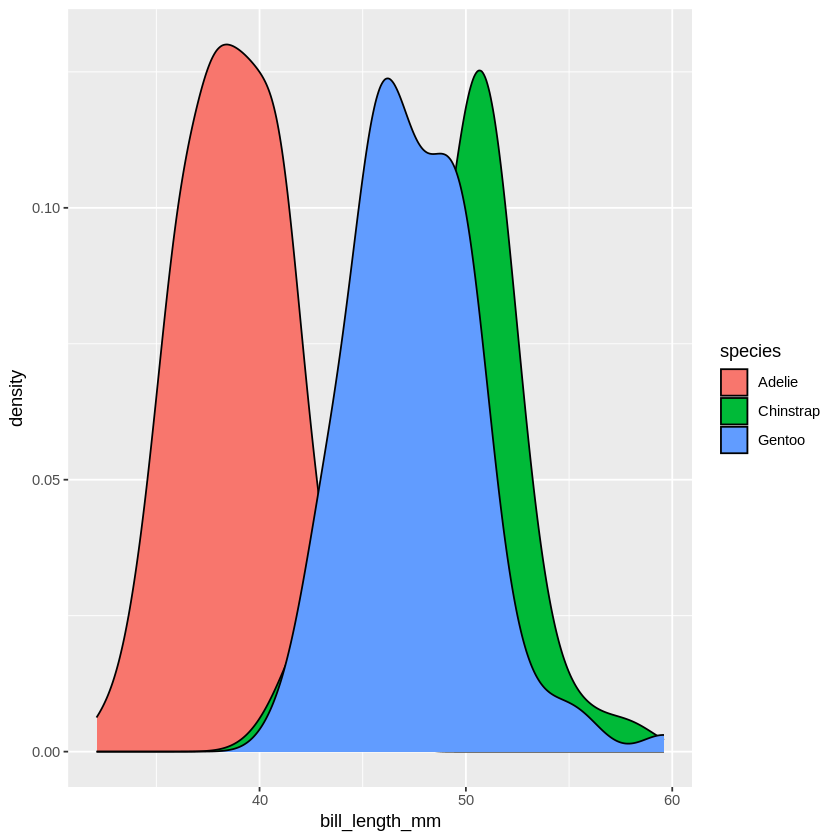

In [172]:
ggplot(penguins, aes(x = bill_length_mm, fill = species)) + geom_density(na.rm = TRUE)

## <a name="alpha">Adjusting the Transparency with `alpha`</a>

---

To address the masking issue, we can control the transparency of the
colors using the `alpha` aesthetic. This value, between 0 and 1,
controls how transparent the objects are.

- `0` means completely transparent (not visible),
- `1` means completely opaque (cannot see anything behind it).

In the code cell below we set `alpha = 0.3`. Notice that we specify this in the `geom` and outside the aesthetic mapping.

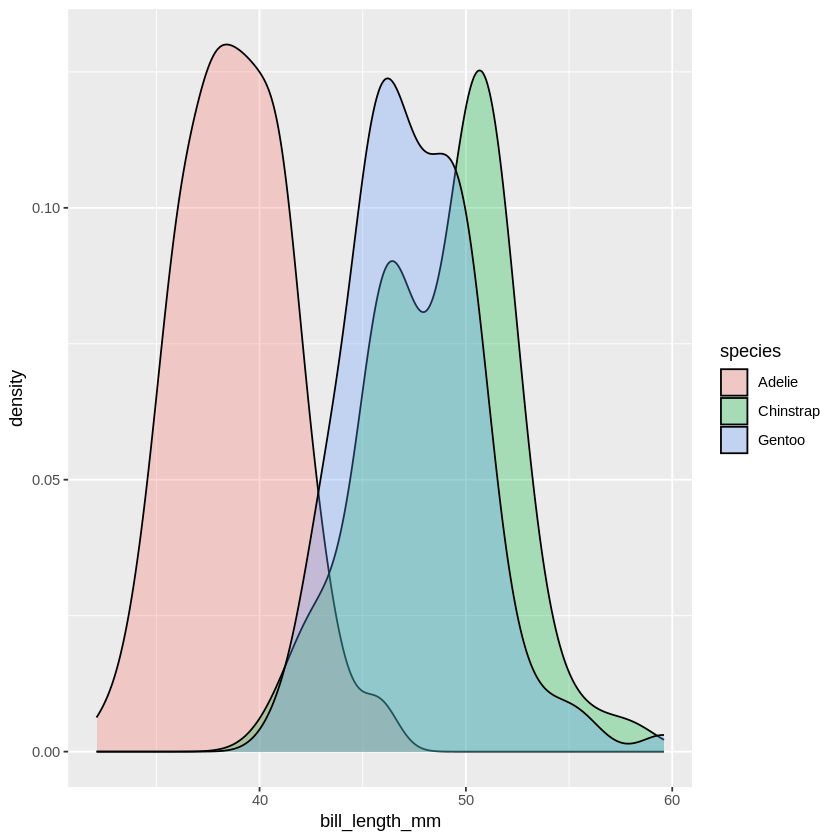

In [180]:
ggplot(penguins, aes(x = bill_length_mm, fill = species)) +
  geom_density(alpha = 0.3, na.rm = TRUE)

# <a name="boxplots">Boxplots</a>

---

A boxplot is a visual representation of a five number summary. In R, we can use the built-in function `boxplot(x)` to create a boxplot of data stored in numeric vector `x`.

- The left (or bottom) edge of the box is drawn at the value of $Q_1$.
- The right (or top) edge of the box is drawn at the value of $Q_3$.
- The median is indicated by a line inside the box.
- The IQR is the width of the box.
- Whiskers extend from each edge of the box to:
  - Either the minimum and maximum values (if there are no outliers),
  - Or the upper and lower fence if there are outliers.
    -   Upper fence $=Q_3 + 1.5(\mbox{IQR})$.
    -   Lower fence $=Q_1 - 1.5(\mbox{IQR})$.
- Any values less than the lower fence are outliers marked by points.
- Any values greater than the upper fence are outliers marked by points.


We can create boxplots in `ggplot` using the same grammar and underlying structure as we discussed with other types of plots.

- Use `geom_boxplot()` to construct a boxplot.
- A boxplot is used to visually summarize a numeric variable.
- Side by side boxplots are effective for comparing the distributions of a numeric variable across multiple levels of a categorical variable.



## <a name="quest7">Question 7</a>

---

Construct a boxplot of the `bill_length_mm` variable in the `penguins` data frame. Be sure to take into account there are two missing values.

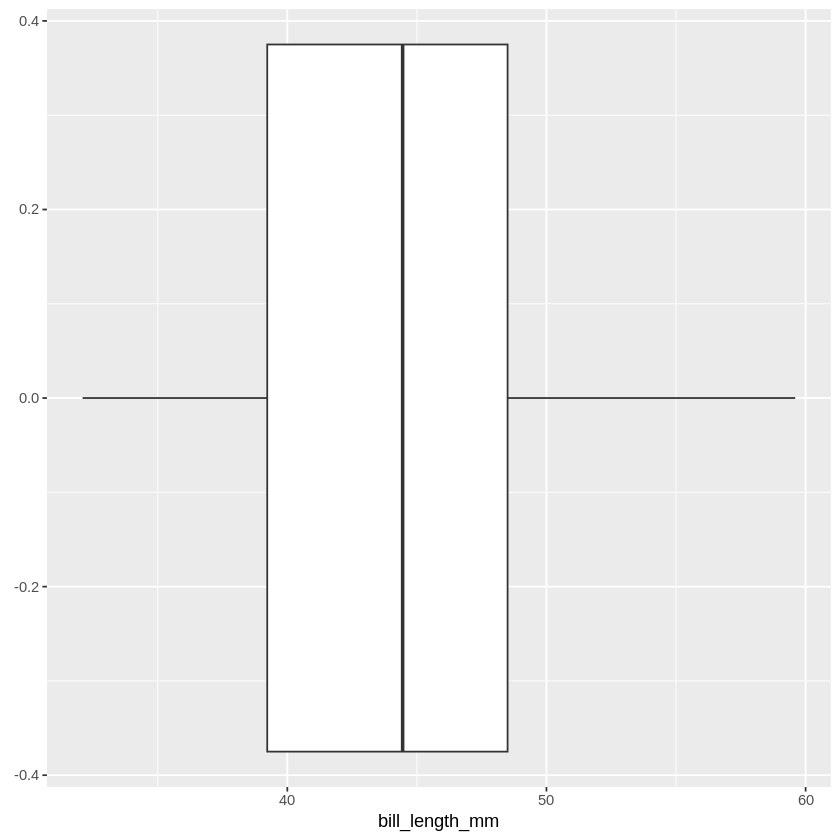

In [182]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_boxplot(na.rm = TRUE)

## <a name="clean-boxplot">A Cleaner Boxplot</a>

---



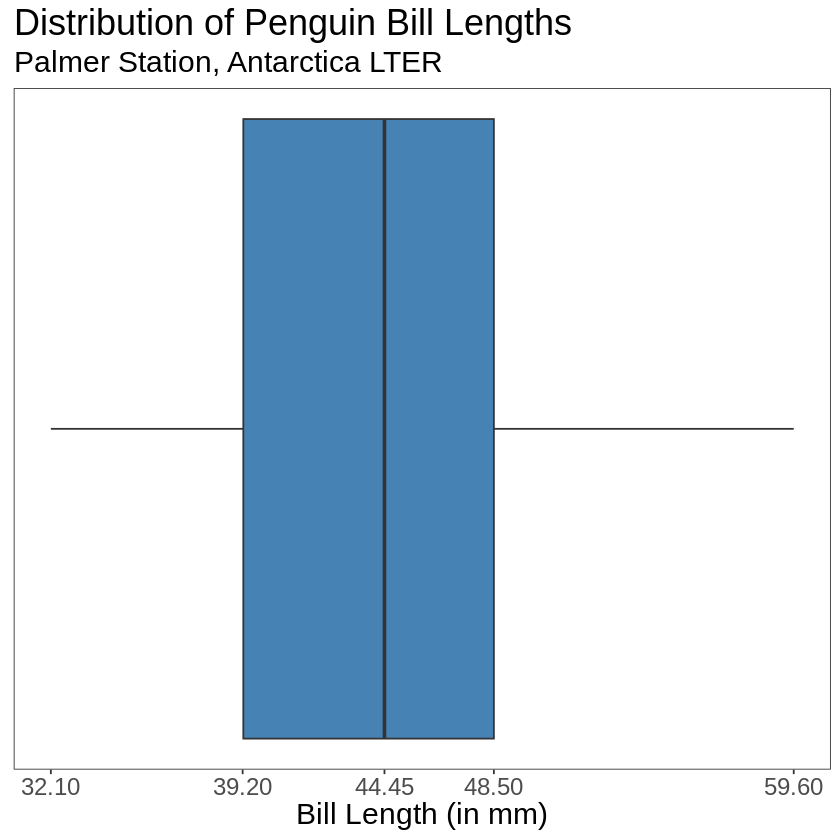

In [190]:
ggplot(penguins, aes(x = bill_length_mm)) +
  geom_boxplot(
    na.rm = TRUE,
    fill = "steelblue"  # set fill color to steelblue
    ) +
  scale_x_continuous(breaks = fivenum(penguins$bill_length_mm)) +  # customize ticks on x-axis
#  scale_y_continuous(breaks = seq(0, 60, by = 5)) +  # customize ticks on y-axis
  labs(
    title = "Distribution of Penguin Bill Lengths",  # add main title
    subtitle = "Palmer Station, Antarctica LTER",  # add subtitle
    x = "Bill Length (in mm)",  # add label on each axis
  ) +
  theme_bw() +  # remove gray panel in background
  theme(
    axis.ticks.y=element_blank(),
    axis.text.y=element_blank(),
    panel.grid.minor = element_blank(),  # remove minor gridlines
    panel.grid.major = element_blank(),  # remove major gridlines
    text = element_text(size=18)  # increase font size
  )

## <a name="side-by-side">Creating Side by Side Boxplots</a>

---

We can create side by side boxplots by simply adding a categorical variable such as `species` to the opposite axis as the one the numeric variable is mapped to.

We can see that the typical responses for the Adelie penguins tend to be
lower than for the Chinstrap and Gentoo penguins. The Chinstrap penguins
tend to have slightly longer beaks that the Gentoo penguins. All three
penguins species seem to have similar variability. A weakness of boxplots is that they throw away a lot of information. We don't see the two sub-populations in the Chinstrap penguins that we noticed earlier when looking at density plots.

- Adding a `fill` color to the boxplots might be a more visually appealing graphic.



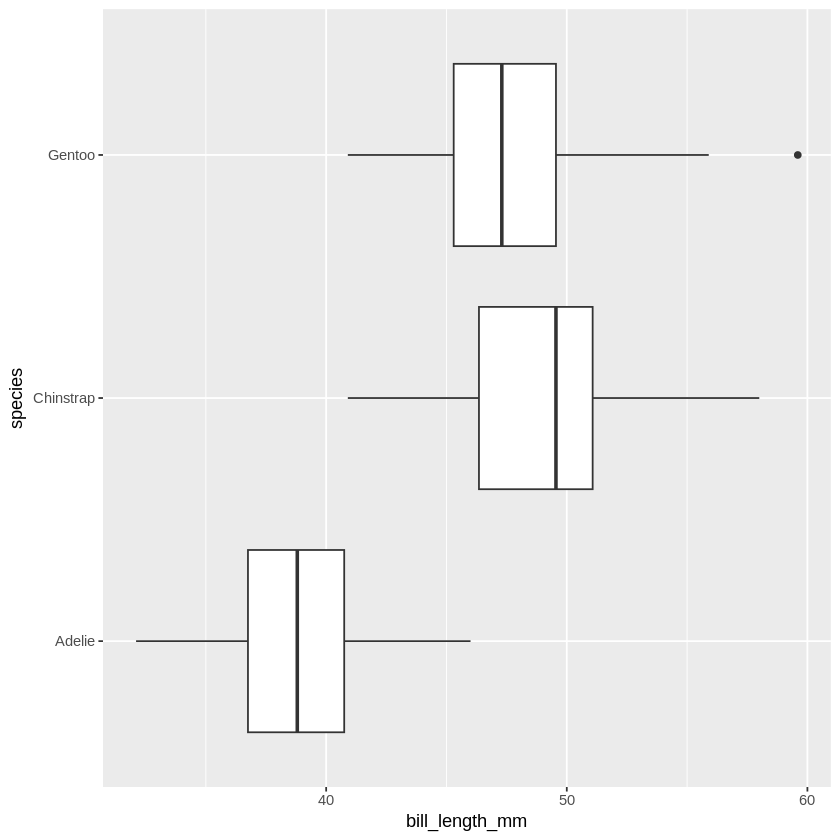

In [191]:
ggplot(penguins, aes(x = bill_length_mm, y = species)) +
  geom_boxplot(na.rm = TRUE)

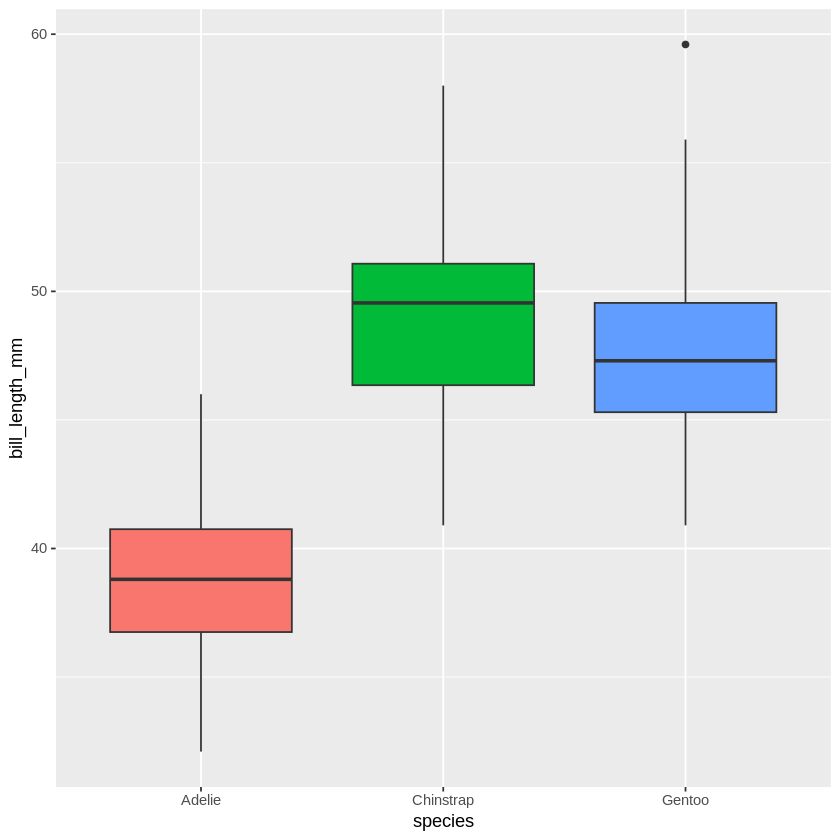

In [194]:
ggplot(penguins, aes(x = species, y = bill_length_mm, fill = species)) +
  geom_boxplot(na.rm = TRUE) +
  theme(legend.position = "none")

# <a name="violin">Violin Plots</a>

---

A <font color="dodgerblue">**violin plot**</font> blends a boxplot and a density plot. A violin plot unites a density with its mirror image and then displays the unified object like a boxplot.

- Use `geom_violin()` to construct a boxplot.
- A violin plot is used to visually summarize a numeric variable.



## <a name="quest8">Question 8</a>

---

Construct a side by side violin plots to compare the distribution of `bill_length_mm` for different `species` in the `penguins` data frame. Be sure to take into account there are two missing values.

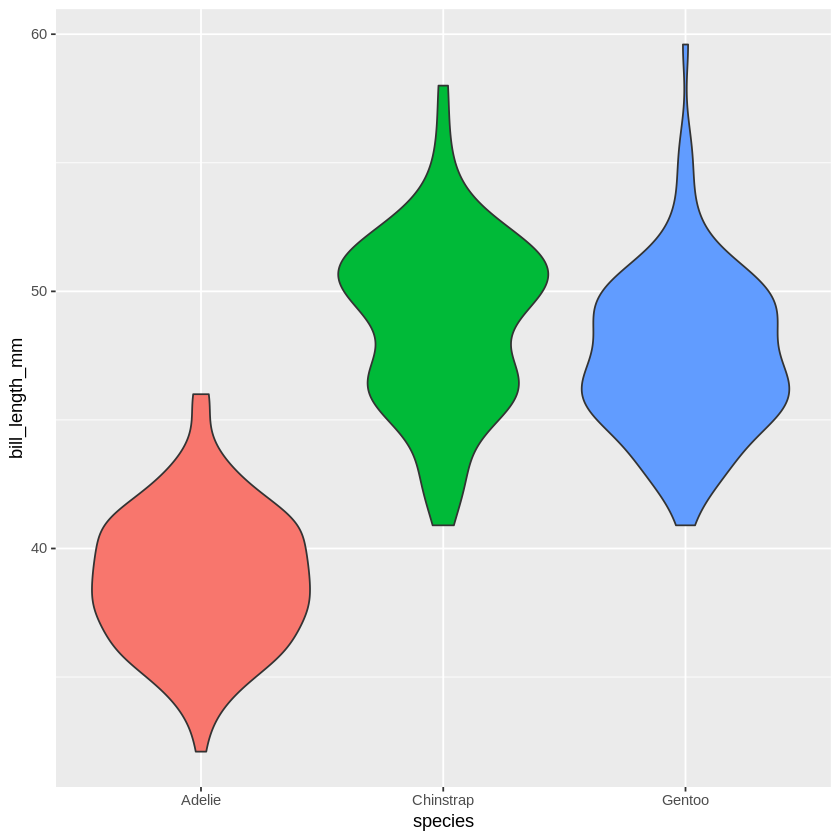

In [197]:
ggplot(penguins, aes(x = species, y = bill_length_mm, fill = species)) +
  geom_violin(na.rm = TRUE) +
  theme(legend.position = "none")

## <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Materials created by the [Department of Mathematical and Statistical Sciences at the University of Colorado Denver](https://github.com/CU-Denver-MathStats-OER/)
and is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/).